<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов. Фиксированный seed позволит получить то же рандомное значение при повторном запуске

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
# Вызов — посмотреть на данные 
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [4]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

Пропуски и полные дубликаты в трейне

In [5]:
na_values_count_train = df_train.isna().sum().reset_index()
na_values_count_train.columns = ['column', 'na_count']

na_values_count_train.query('na_count > 0')

column  na_count
8     mileage       202
9      engine       202
10  max_power       196
11     torque       203
12      seats       202

In [6]:
df_train.duplicated().sum()

985

Пропуски и полные дубликаты в тесте

In [7]:
na_values_count_test = df_test.isna().sum().reset_index()
na_values_count_test.columns = ['column', 'na_count']

na_values_count_test.query('na_count > 0')

column  na_count
8     mileage        19
9      engine        19
10  max_power        19
11     torque        19
12      seats        19

In [8]:
df_test.duplicated().sum()

62

Дашборд

In [9]:
from ydata_profiling import ProfileReport

/Users/angelina/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
ProfileReport(df_train).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Что видим в дашборде**

- В датасете достаточно высокая доля дубликатов (7%). От них нужно будет избавляться. С учетом и так небольшого числа наблюдений — это негативная характеристика полученных данных (общий комментарий, если бы мы могли управлять источником данных)
- Очень много уникальных значений в поле name — имеет смысл предобработать, поделив на несколько. С точки зрения смысла, в них лежат влияющие на цену значения
- Числовые переменные распределены не нормально, среднее по ним не будет являться лучшей характеристикой
- Присутствуют сильно скошенные распределения по категориям (с небольшим их количеством) – хорошо бы построить боксплоты по ним и проверить, меняются ли статистики целевой переменной. Если нет — ислючить переменную
- Есть замечания по формату данных – mileage, engine, max_power и torque нужно будет предобрабатывать, вычищая единицы изменения (видим их в облаке слов) и приводя в числовой формат
- Часть признаков-объектов можно будет перевести в категории, например owner. Большей части групп можно будет явно присвоить число-ранг, не связанные с числом (Test Drive) — понизить с помощью этого ранга (с точки зрения бизнес-смысла). Transmission с двумя признаками переводится в бинарный формат
- Видим сильную корреляцию целевой переменной с метрикой km_driven и year (по хитмапу)

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [11]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_train.describe()

year  selling_price   km_driven    seats
count 6999.000       6999.000    6999.000 6797.000
mean  2013.818     639515.197   69584.616    5.419
std      4.053     808941.912   57724.002    0.966
min   1983.000      29999.000       1.000    2.000
25%   2011.000     254999.000   35000.000    5.000
50%   2015.000     450000.000   60000.000    5.000
75%   2017.000     675000.000   97000.000    5.000
max   2020.000   10000000.000 2360457.000   14.000

In [12]:
df_test.describe()

year  selling_price  km_driven   seats
count 1000.000       1000.000   1000.000 981.000
mean  2013.681     617901.042  71393.341   5.411
std      4.012     758553.861  48486.219   0.920
min   1995.000      31000.000   1303.000   4.000
25%   2011.000     250000.000  37000.000   5.000
50%   2014.000     434999.000  61500.000   5.000
75%   2017.000     670000.000 100000.000   5.000
max   2020.000    6000000.000 375000.000   9.000

По вещественным признакам:
- Внутри сплитов средняя и медиана отличаются друг от друга. Данные распределены не нормально. В этом случае медиана будет являться более надежной характеристикой
- Между статистиками теста и трейна также есть различия. Между медианами они ниже (исключение — year), чем между средними, это объяснеяется не только ненормальностью распределения, но и возможными выбросами в обоих датасетах. Еще один повод опираться на медиану как на основную статистику метрики

In [13]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [14]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

По категориальным признакам:
- Разное число уникальных категорий в name — еще один сигнал для обработки признака
- Самая частотная категория по столбцам fuel, seller_type, transmission, owner не отличаются – это хороший знак, говорит о репрезентативности признаков в трейне
- Признаки, которые должны быть вещественными (mileage, engine, max_power, torque) лучше не сравнивать, после обработки распределение может поменяться (по тем признакам, где данные однородны и нужно будет только удалить единицы измерения – на самом деле нет, но правильно все равно рассматривать по ним статитистики вещенственных признаков)

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [15]:
feature_columns = df_train.columns.to_list()
feature_columns.remove('selling_price')
df_train.duplicated(subset=feature_columns).sum()

1159

In [16]:
df_train[df_train.duplicated(subset=feature_columns)].sort_values(by=feature_columns).head()

name  year  selling_price  km_driven  \
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
1337            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   

        fuel seller_type transmission        owner     mileage   engine  \
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
1337  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
1595  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
2787  Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   

       max_power               torque  seats  
6307  174.33 bhp  380Nm@ 1750-2500rpm  5.000  
6704   241.4 bhp  580Nm@ 1400-3250rpm  5.000  
1337     188 bhp  400nm@ 1750-3000rpm  5.000  
1595     188 bhp  400nm@ 1750-3000rpm  5.000  
2787     188 bhp  400nm@ 1750-3000rpm  5.000

In [17]:
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first').reset_index(drop=True)

In [18]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [19]:
import re

In [20]:
df_train.mileage.str.split().str[1].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

Данные в mileage лежат в разных единицах измерения, нужно будет добавить функцию для перевода (km/kg зависит от плотности топлива)

In [21]:
def mileage_converter(row):
    fuel_densities = {
        'diesel': 0.850,   
        'petrol': 0.745,   
        'lpg': 0.540,      
        'cng': 0.720
    }
    
    fuel = row['fuel'].lower()
    density = fuel_densities.get(fuel, None)
    mileage = row['mileage']

    if isinstance(mileage, (int, float)):
        return float(mileage)
        
    value, mesure = mileage.split()
    value = float(value)
    
    if mesure == 'kmpl':
        return value
    elif mesure == 'km/kg':
        if density is not None:
            return value * density
        else:
            return None
    else:
        return None

In [22]:
df_train['mileage'] = df_train.apply(mileage_converter, axis=1)
df_test['mileage'] = df_test.apply(mileage_converter, axis=1)

df_train['engine'] = df_train.engine.str.extract(r'(\d+)').astype(float)
df_test['engine'] = df_test.engine.str.extract(r'(\d+)').astype(float)

df_train['max_power'] = df_train.max_power.str.extract(r'(\d+\.?\d*)').astype(float)
df_test['max_power'] = df_test.max_power.str.extract(r'(\d+\.?\d*)').astype(float)

In [23]:
def torque_processing(torque):
    values = []
    torque = str(torque).lower()
    
    first_value = re.match(r'(\d+\.?\d*)', torque)
    
    if first_value:
        if 'nm' in torque:
            values.append(float(first_value.group(1)))
        elif 'kg' in torque:
            values.append(round(float(first_value.group(1))*9.80665,2)) # округляем до 2х знаков, тк. значение в nm лежат в таком формате
        else:
            values.append(None)  
    else:
        values.append(None)

    second_value = re.search(r'(?:\s|/)(\d[\d,-]*)', torque)
    
    if second_value:
        second_value_updated = second_value.group(1).replace(',', '').split('-')
        values.append(max([float(val) for val in second_value_updated]))
    else:
         values.append(None)

    return values

Значения без единиц измерения можно было бы попытаться предобработать, сравнивания, и относя визуально к нужным единицам. Но, тк. мы не знаем, какие фактические значения могут приходить в сервис, лучше пропустить такие кейсы

In [24]:
df_train[['torque', 'max_torque_rpm']] = df_train.torque.apply(lambda x: torque_processing(x)).apply(pd.Series)

In [25]:
df_test[['torque', 'max_torque_rpm']] = df_test.torque.apply(lambda x: torque_processing(x)).apply(pd.Series)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [26]:
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
torque            196
seats             186
max_torque_rpm    190
dtype: int64

In [27]:
mileage_median = round(df_train.mileage.median(),2)
engine_median = round(df_train.engine.median(),0)
max_power_median = round(df_train.max_power.median(),2)
torque_median = round(df_train.torque.median(),2)
seats_median = round(df_train.seats.median(),0)
max_torque_rpm_median = round(df_train.max_torque_rpm.median(),0)
# для использования в сервисе на случай пропусков в "продовых" данных
year_median = int(df_train.year.median())
km_driven_median = round(df_train.km_driven.median(),2)

In [28]:
dict_medians = {'mileage': mileage_median,
         'engine': engine_median,
         'max_power': max_power_median,
         'torque': torque_median,
         'seats': seats_median,
         'max_torque_rpm': max_torque_rpm_median,
         'year': year_median,
         'km_driven': km_driven_median
        }

df_train = df_train.fillna(dict_medians)
df_test = df_test.fillna(dict_medians)

In [29]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [30]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

**Почему стоит применять именно медиану. Могли ли мы применить среднее?**

В пользу применения медианы выступают две причины: 
- ее устойчивость в выбросам, соответственно, на шумных данных она будет гораздо лучше характеризовать метрику, чем среднее
- ненормальность распределения признаков (которая наблюдается в наших числовых переменных), в таком случае среднее может смещаться в сторону значений длинного хвоста, тк они больше / меньше по абсолютам, чем мода. При этом правильной оценкой для них является статистика, учитывающая частотность. В таком кейсе можно было бы подумать об использовании среднего взвешенного, но для простоты лучше брать медиану.

Если среди предобработанных вещественных признаков есть нормально распределенные – для них можно было бы использовать среднее.

Также нужно всегда помнить о бизнес-смысле параметров, с которыми работаем. Так для поюзерных денежных метрик использование среднего будет более предпочтительным с точки зрения интерпретируемости (но тогда большое внимание нужно будет уделить осмысленной очистке выбросов). 

**Как правильно считать медиану для заполнения?**

По тренировочным данным для `train` и `test`, чтобы не произошло утечки и следовательно переобучения. Также, при выкатке модели на прод, у нас не будет возможности считать статистику для заполнения на поступающих риал тайм данных, поэтому обработку тестового датасета также можно использовать как имитацию работы с продовыми данными

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [31]:
df_train['engine'] = df_train.engine.astype(int)
df_train['seats'] = df_train.seats.astype(int)

df_test['engine'] = df_test.engine.astype(int)
df_test['seats'] = df_test.seats.astype(int)

Количество мест в авто как правило строго ограничено, всегда дискретно и будет иметь небольшое число уникальных значений. За ним может скрываться тип автомобиля (легковые, спортивные, минивэны и тп, тк все они имеют разное число посадочных мест), то есть число в данном случае несет в себе не привязанную к его размеру характеритику, а говорит нам о категории объекта

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [32]:
df_train.describe()

year  selling_price   km_driven  mileage   engine  max_power  \
count 5840.000       5840.000    5840.000 5840.000 5840.000   5840.000   
mean  2013.428     522960.091   73952.242   19.330 1429.449     87.906   
std      4.096     535432.002   60071.137    4.000  485.663     31.640   
min   1983.000      29999.000       1.000    0.000  624.000      0.000   
25%   2011.000     250000.000   39000.000   16.800 1197.000     68.000   
50%   2014.000     405000.000   70000.000   19.300 1248.000     81.860   
75%   2017.000     640000.000  100000.000   22.070 1498.000     99.000   
max   2020.000   10000000.000 2360457.000   42.000 3604.000    400.000   

        torque    seats  max_torque_rpm  
count 5840.000 5840.000        5840.000  
mean   175.222    5.427        3044.762  
std    107.046    0.982         911.090  
min     47.070    2.000        1400.000  
25%    111.800    5.000        2250.000  
50%    160.000    5.000        3000.000  
75%    200.015    5.000        4000.000  
max   1863.260   14.000       21800.000

In [33]:
df_test.describe()

year  selling_price  km_driven  mileage   engine  max_power  \
count 1000.000       1000.000   1000.000 1000.000 1000.000   1000.000   
mean  2013.681     617901.042  71393.341   19.272 1454.876     90.842   
std      4.012     758553.861  48486.219    3.978  521.996     34.893   
min   1995.000      31000.000   1303.000    0.000  624.000     34.200   
25%   2011.000     250000.000  37000.000   16.500 1197.000     69.000   
50%   2014.000     434999.000  61500.000   19.300 1248.000     82.425   
75%   2017.000     670000.000 100000.000   22.300 1582.000    102.000   
max   2020.000    6000000.000 375000.000   28.400 3604.000    280.000   

        torque    seats  max_torque_rpm  
count 1000.000 1000.000        1000.000  
mean   177.667    5.403        3098.276  
std    103.714    0.913         877.147  
min     48.000    4.000        1500.000  
25%    111.700    5.000        2500.000  
50%    160.000    5.000        3000.000  
75%    205.000    5.000        4000.000  
max   1421.960    9.000        5200.000

**Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?**

Да, особенно если пропуски составляют заметную долю от объема признака (в нашем датасете ~3%).

Заполняя пропуски медианой, мы увеличиваем число наблюдений, находящихся в середене распределения, делаем ее более плотной. При этом значение медианы может находиться далеко от моды, создавая искусственный пик.

Кроме этого, мы заполняем пропуски в тесте медианой из трейна, тем самым сближая распределения, если до этого они были различны. 

На примере нашего кейса по заполняемым признакам — сблизились среднее и медиана внутри каждого сплита, также сблизились статистики трейна и теста.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [34]:
number_columns = df_train.select_dtypes(include=['number']).columns

In [35]:
# Восстановление настроек после ydata-profiling
%matplotlib inline

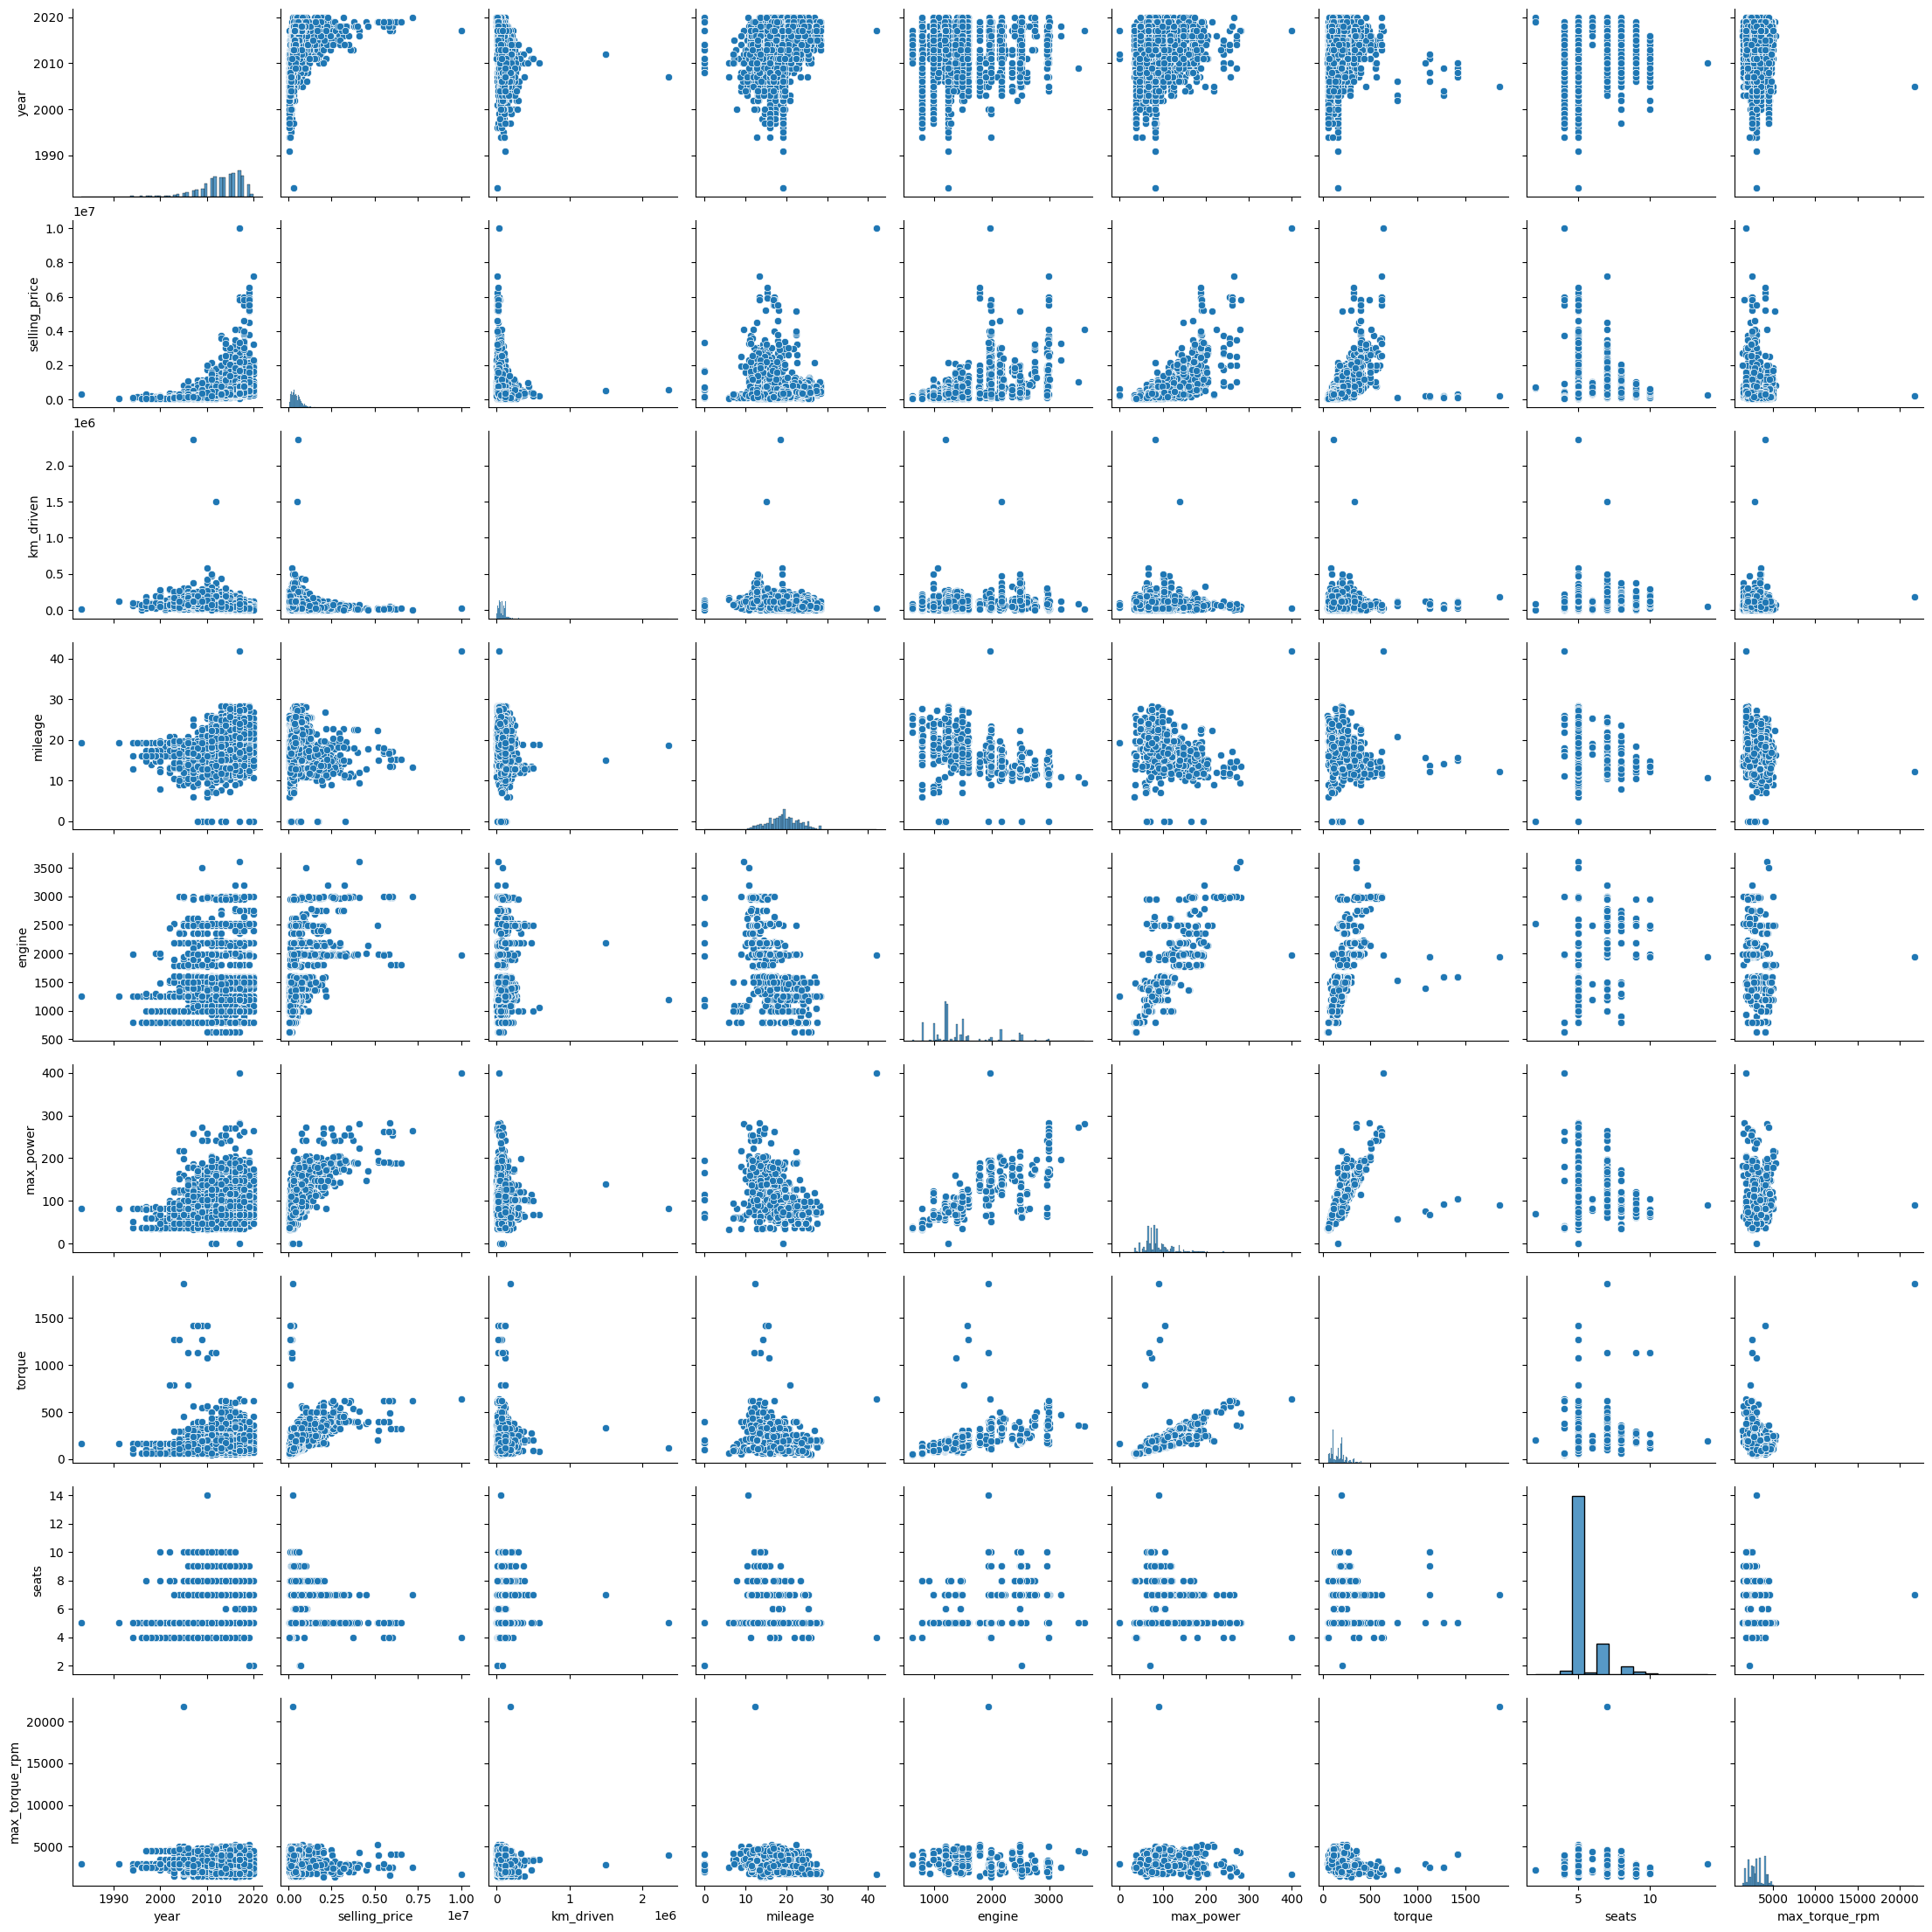

In [36]:
sns.pairplot(df_train[number_columns])
plt.show()

**Можно ли предположить на основе распределений связь признаков с целевой переменной?**

Да, для вещественных признаков по форме диаграммы рассеивания можно предлагать варианты включения / исключения признаков из модели. Кроме того, по форме распределения можно выдвинуть предположения о типе связи (логарифмическая, квадратическая, линейная и тд). Этот шаг в том числе поможет использовать подходящий коэффициент корреляции на этапе EDA.

**Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**

Да, попарные диаграммы позволяют нам это сделать. Мы можем заподозрить наличие и тип связи не только признака с целевой переменной, но и друг с другом. Это даст нам возможность исключить зависящие друг от друга признаки, что тоже приводит к росту качества модели.

**Выводы по корряляциям (ниже)**

По построенной диаграмме рассеивания видно, что многие признаки имеют выбросы. Для наилучшей интерпретации, а также дальнейшего сравнения с распределением тестовых данных, построим pairplot по очищенным от экстремальных значений данным трейна

In [37]:
def remove_outliers(df, columns, q1=0.25, q3=0.75):
    for column in columns:
        
        Q1 = df[f'{column}'].quantile(q1)
        Q3 = df[f'{column}'].quantile(q3)
        IQR = Q3 - Q1
        
        border_left = max(0, Q1 - 1.5*IQR) # наши вещественные признаки строго положительные
        border_right = Q3 + 1.5*IQR
    
        df = df \
            .query(f'{column} >= @border_left and {column} <= @border_right') \
            .reset_index(drop=True)
        
    return df

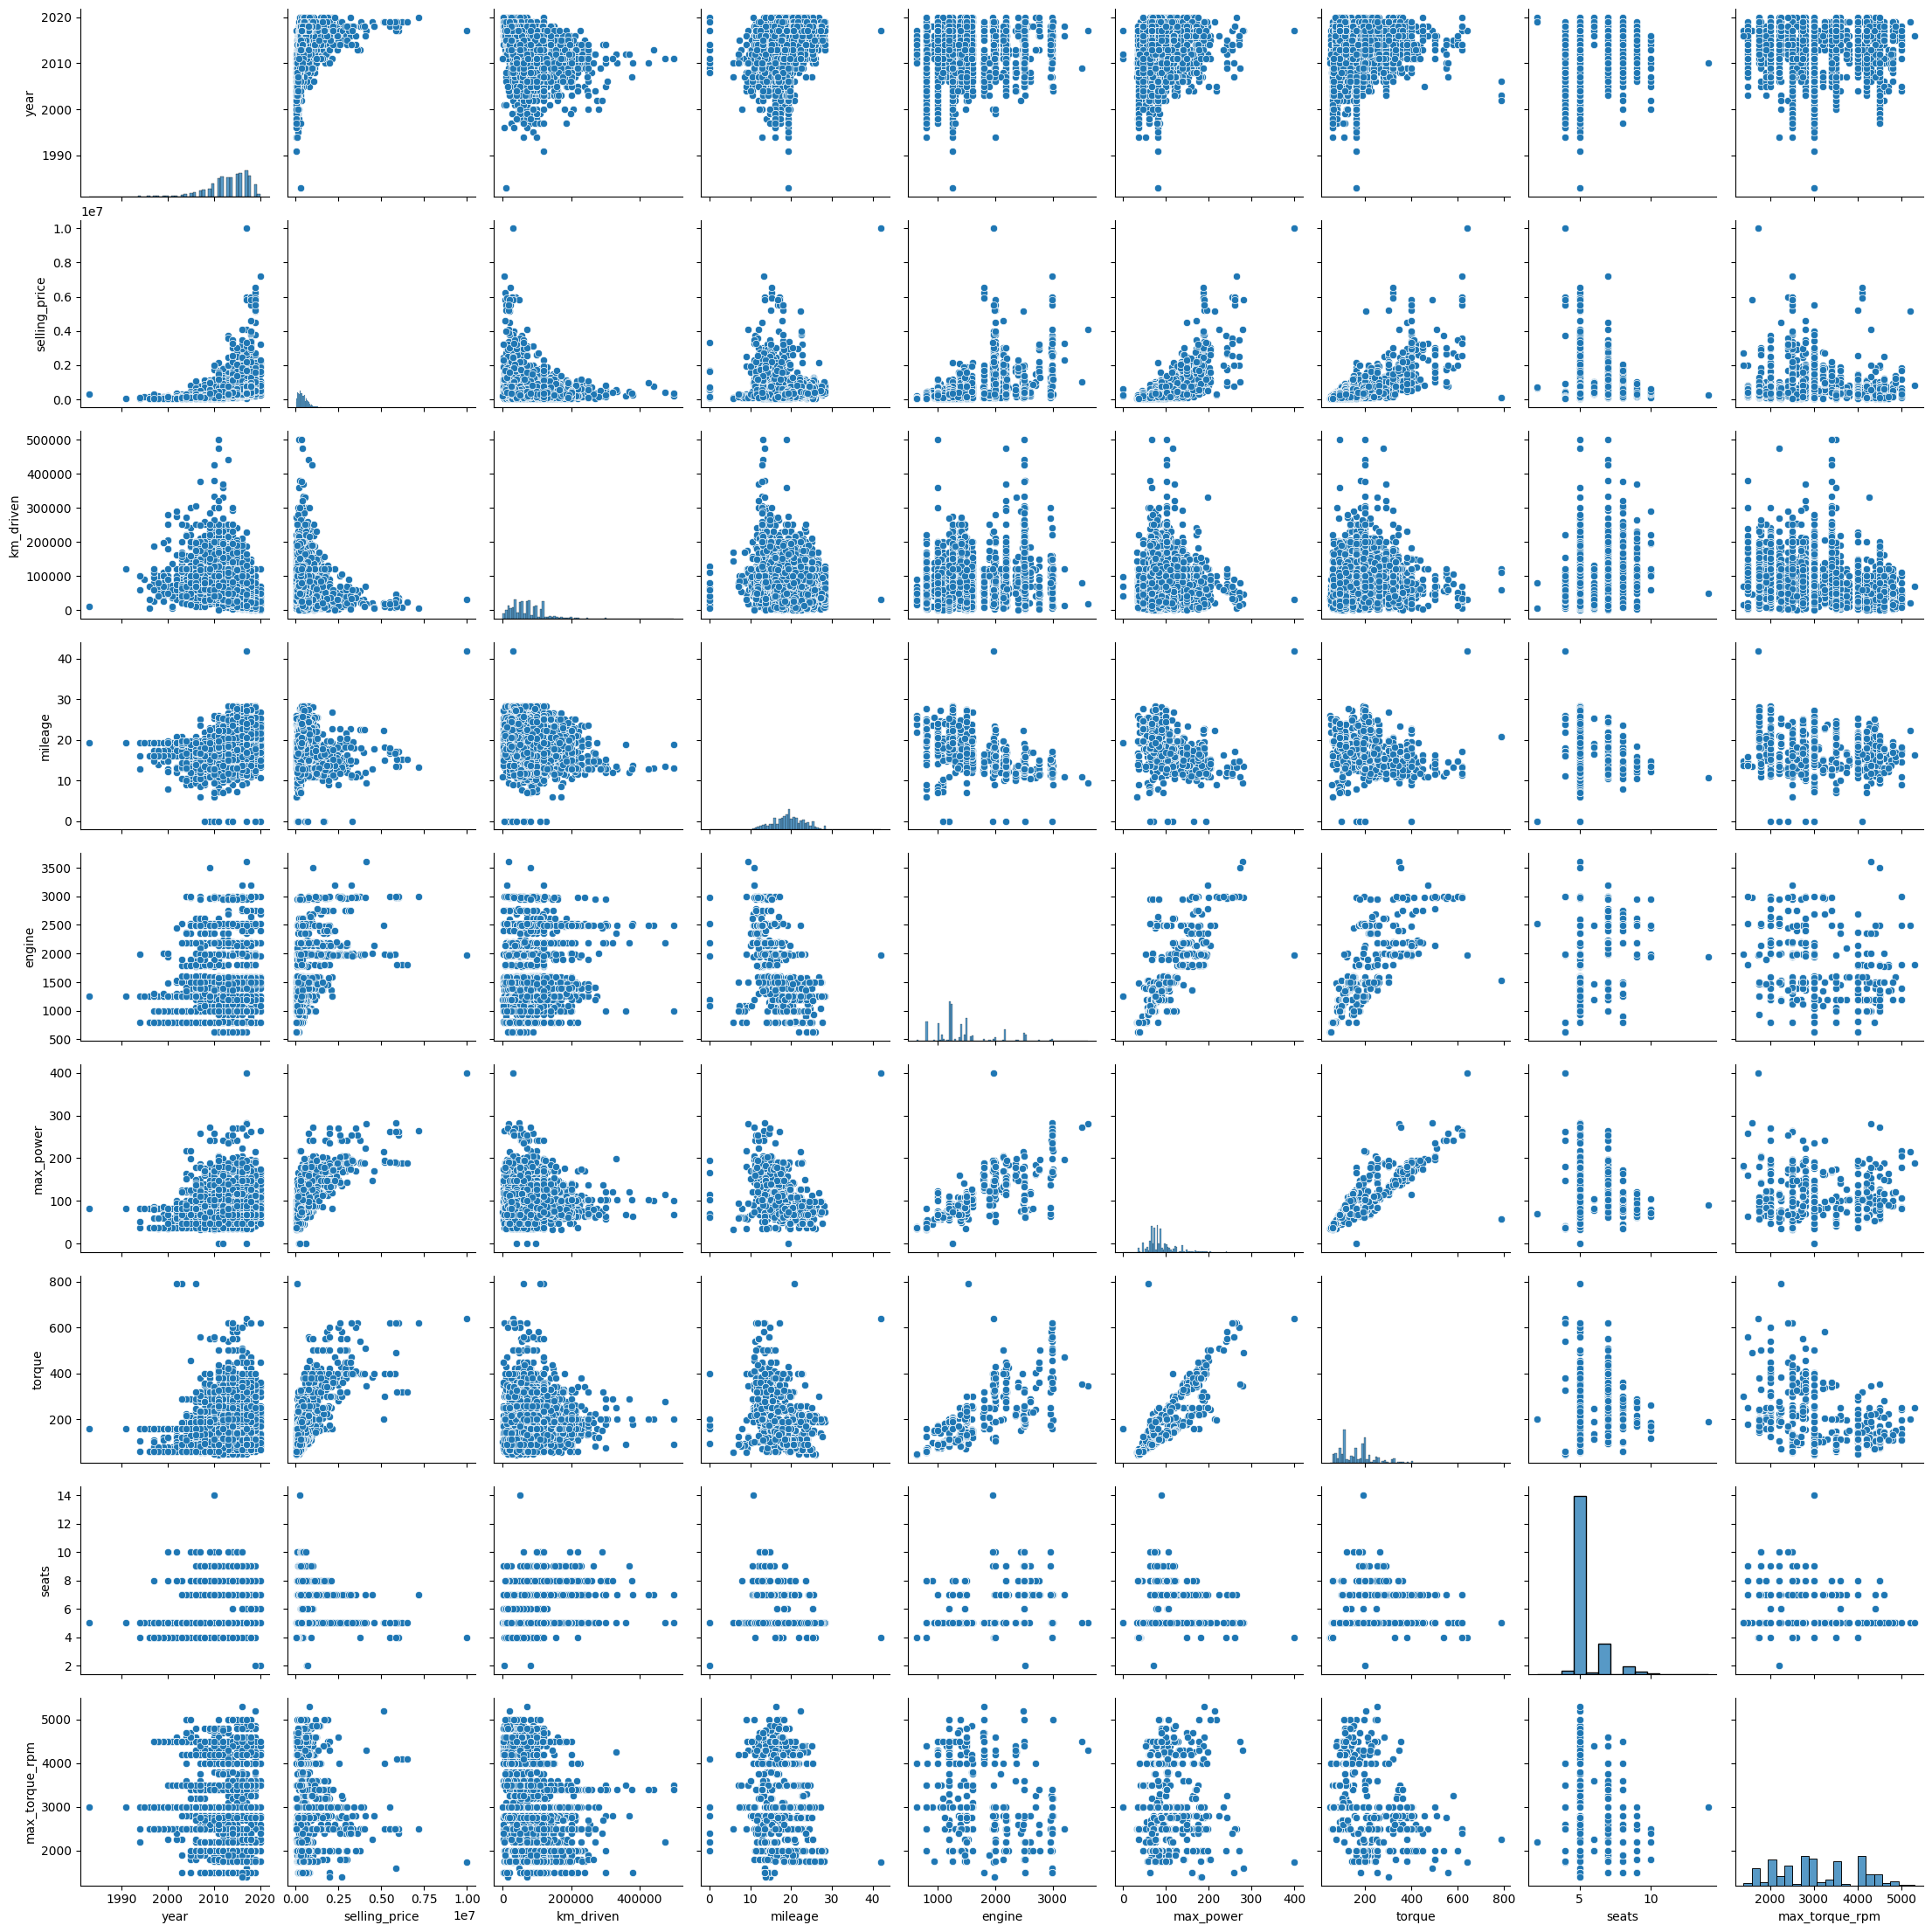

In [38]:
# Пройдемся по набору колонок, в которых увидели выбросы на прошлом шаге
# Выбираем строгие значения квантилей, чтобы убрать самые экстремальные значения, стараясь не исказить форму распределения

columns = ['km_driven', 'mileage', 'max_power', 'torque', 'max_torque_rpm']
sns.pairplot(remove_outliers(df_train[number_columns], columns, 0.01, 0.99))
plt.show()

**Связь с целевой переменной**

По диаграмме рассеивания можно предположить корреляцию переменных:
- year — логарифмическая или гиперболическая обратная
- km_driven — логарифмическая или гиперболическая прямая
- mileage — сложно определить форму зависимости, возможна слабая обратная
- engine — возможна квадратическая прямая зависимость
- max_power — прямая, возможно линейная
- torque – прямая, возможно квардратическая
- seats – сложно определить характер
- max_torque_prm — визуально зависимости скорее нет

**Связь признаков друг с другом**

Из наиболее визуально очевидных:
- year и km_driven — обратная, возможно гиперболическая
- engine и max_power — линейная прямая
- engine и torque – линейная прямая
- max_power и torque – линейная прямая

**Тестовые данные**

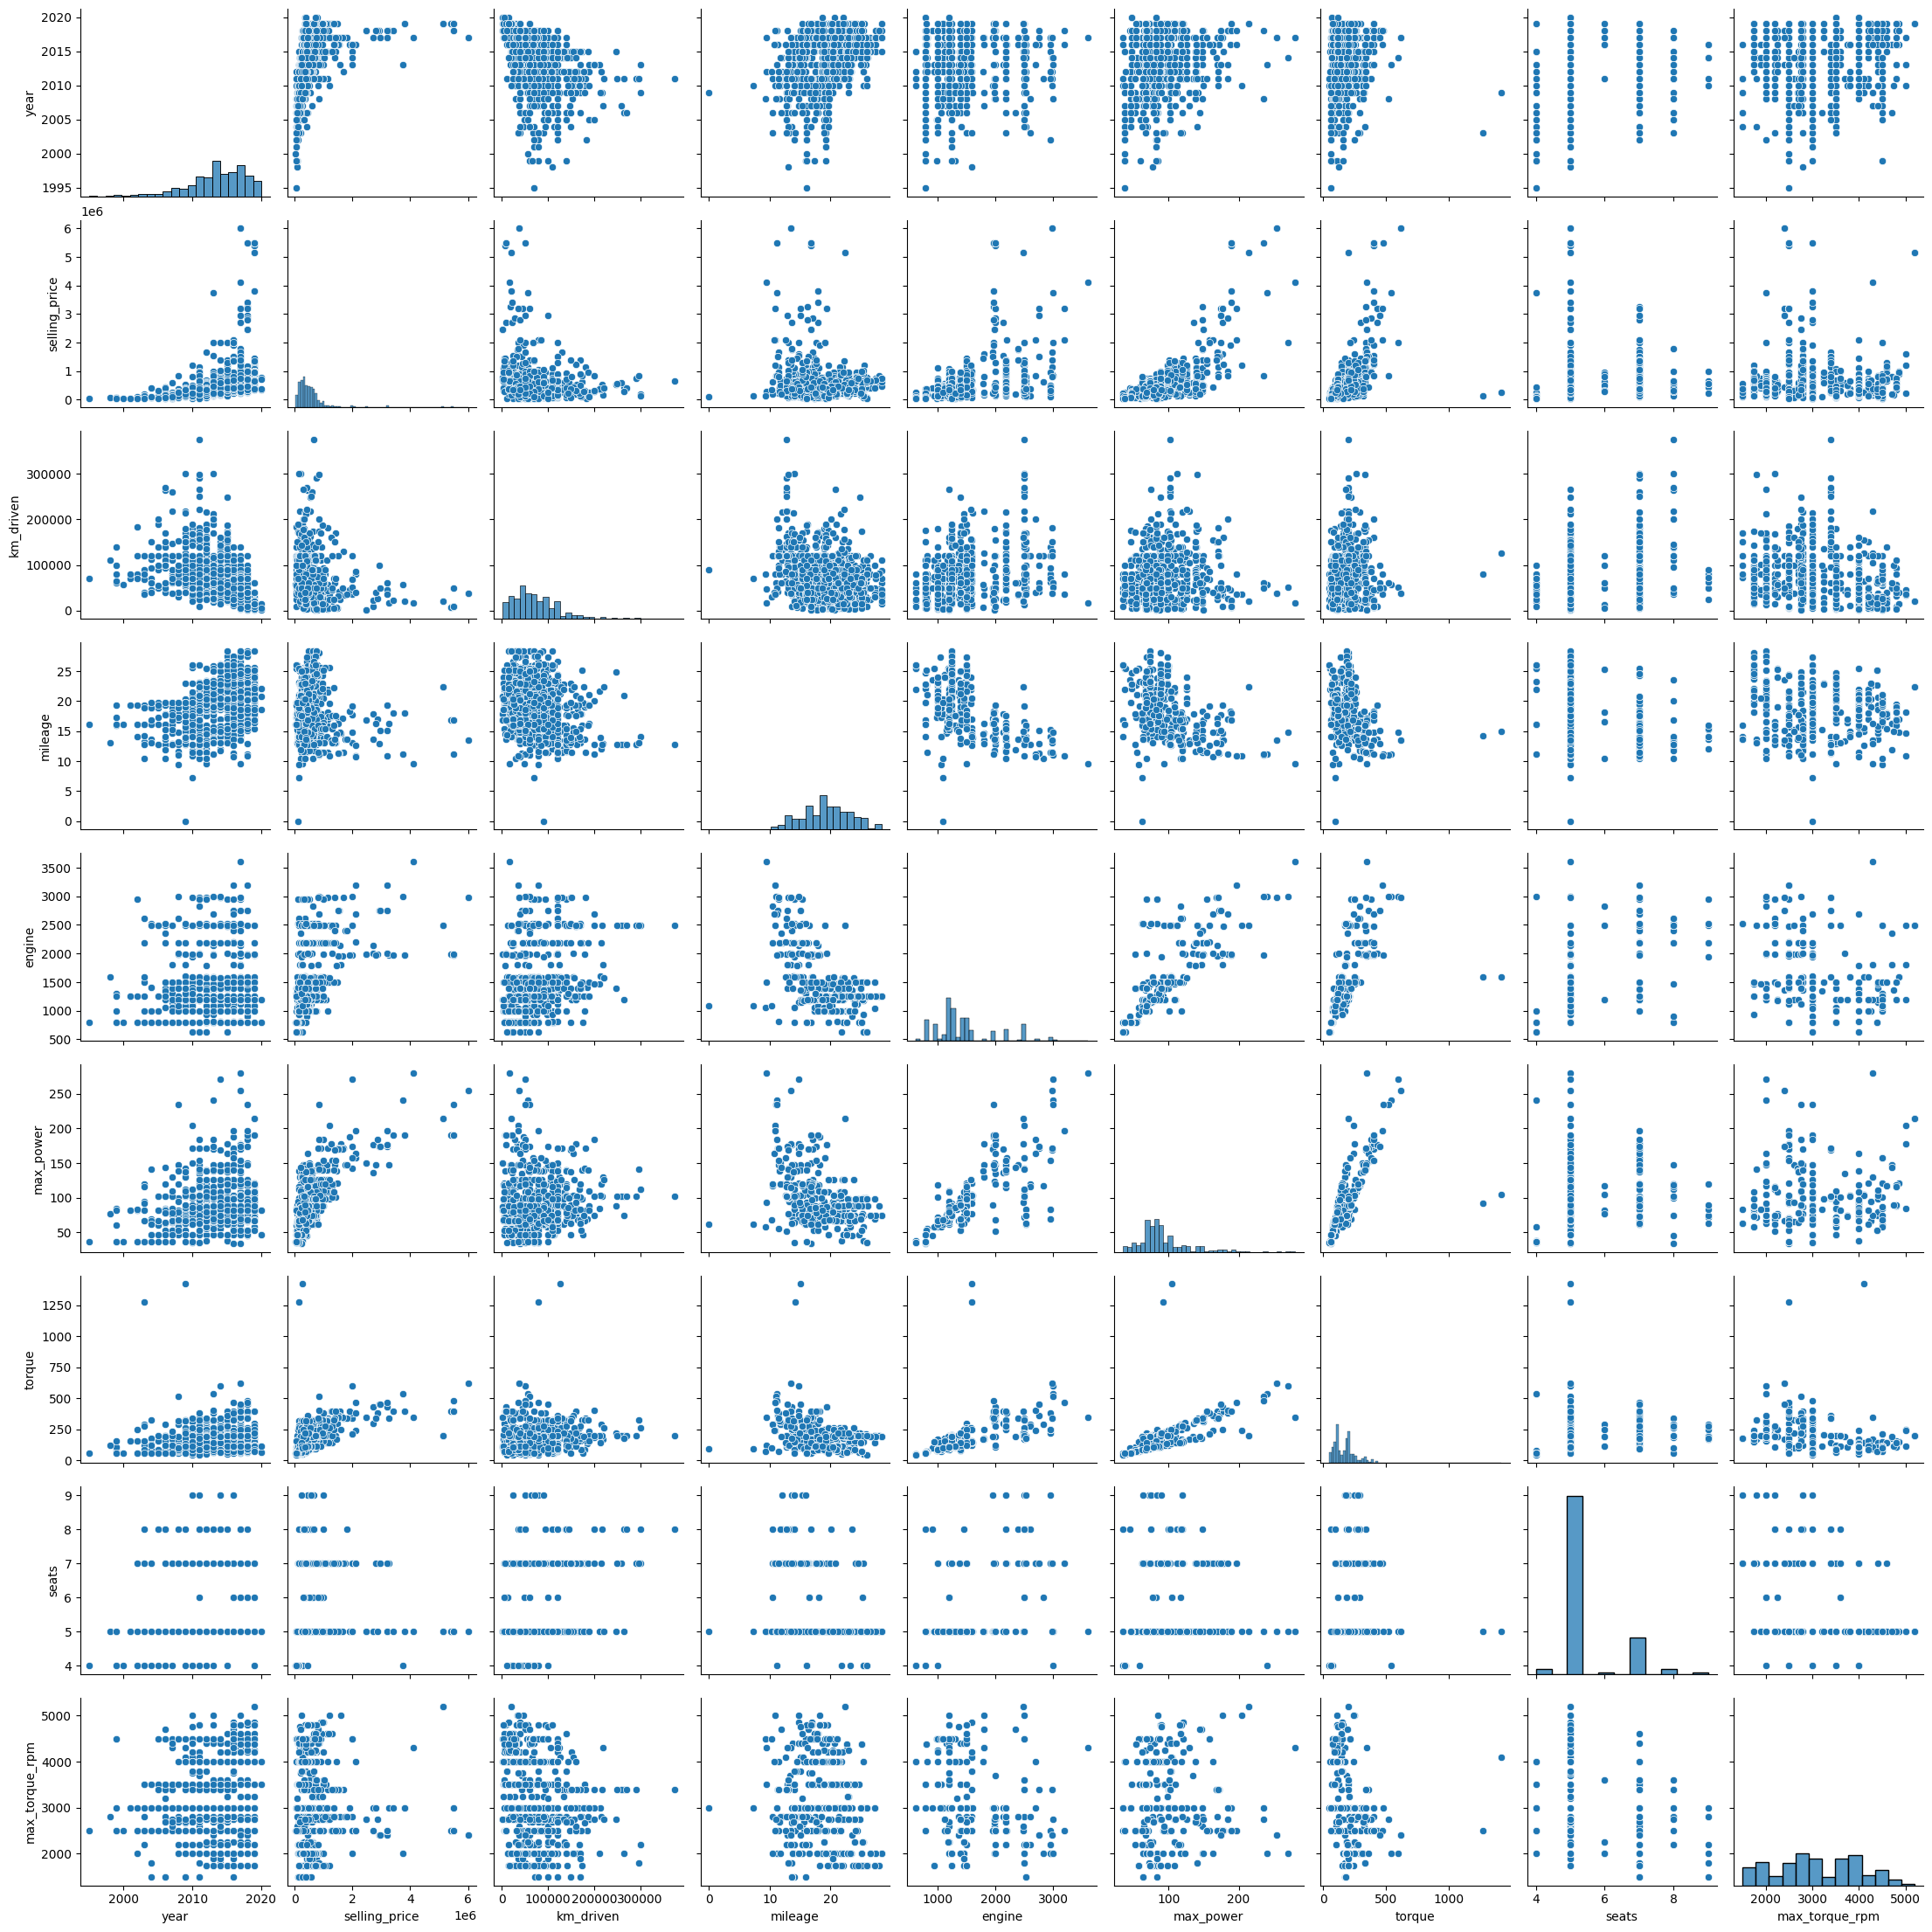

In [39]:
sns.pairplot(df_test[number_columns])
plt.show()

**Похожими ли оказались совокупности при разделении на трейн и тест?**

В трейне присутствует заметно больше выбросов. Если их не убрать, это затруднит сравнение характера и типа зависимости между трейном и тестом. Поэтому для ответа на вопрос о корреляции, будем сравнивать очищенный pairplot трейна и с диаграммой теста.

Для части переменных, как при корреляции друг с другом, так и при корреляции с целевой переменной — распределения имеют похожую форму и носят один и тот же характер. Сравнивая значения, предположу, что если бы мы очистили от выбросов и тест — распределения бы совпали.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [40]:
df_corr_pearson = df_train[number_columns].corr()
df_corr_pearson

year  selling_price  km_driven  mileage  engine  max_power  \
year            1.000          0.427     -0.369    0.343   0.003      0.157   
selling_price   0.427          1.000     -0.165   -0.092   0.448      0.693   
km_driven      -0.369         -0.165      1.000   -0.183   0.230      0.025   
mileage         0.343         -0.092     -0.183    1.000  -0.551     -0.350   
engine          0.003          0.448      0.230   -0.551   1.000      0.681   
max_power       0.157          0.693      0.025   -0.350   0.681      1.000   
torque          0.054          0.466      0.112   -0.213   0.598      0.659   
seats           0.041          0.150      0.192   -0.439   0.652      0.244   
max_torque_rpm  0.050         -0.088     -0.205   -0.191  -0.246     -0.023   

                torque  seats  max_torque_rpm  
year             0.054  0.041           0.050  
selling_price    0.466  0.150          -0.088  
km_driven        0.112  0.192          -0.205  
mileage         -0.213 -0.439          -0.191  
engine           0.598  0.652          -0.246  
max_power        0.659  0.244          -0.023  
torque           1.000  0.317          -0.268  
seats            0.317  1.000          -0.206  
max_torque_rpm  -0.268 -0.206           1.000

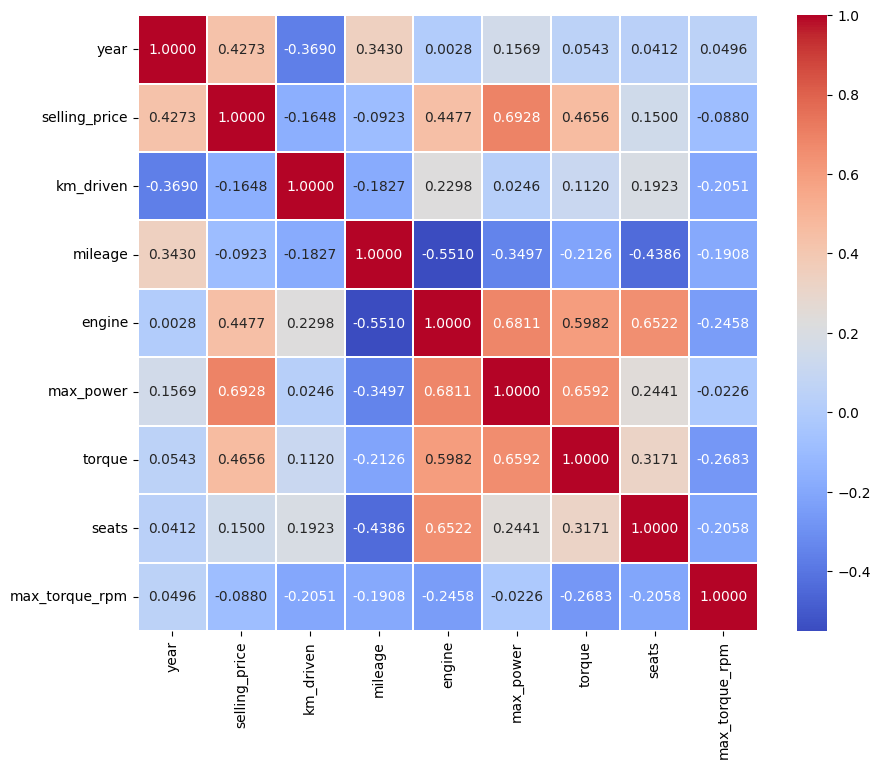

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_pearson, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.3)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Какие 2 признака наименее скоррелированы между собой?**

Engine и Year

**Между какими наблюдается довольно сильная положительная линейная зависимость?**

Selling Price (наша целевая переменная) и Max Power, Engine и Max Power, Max Power и Torque, Engine и Seats

**Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**

Да, мы видим отрицательную  корреляцию между этими признаками

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [42]:
def corr_spearman(x,y):
    rank_x = np.argsort(np.argsort(x))
    rank_y = np.argsort(np.argsort(y))

    delta = rank_x - rank_y
    num = 6 * np.sum(pow(delta, 2))
    den = len(x) * (pow(len(x), 2) - 1)
    coeff = 1 - (num / den)

    return coeff

In [43]:
df_corr_spearman = pd.DataFrame(index=number_columns, columns=number_columns)

for feature_1 in number_columns:
    for feature_2 in number_columns:
        coeff_spearman = corr_spearman(df_train[feature_1],df_train[feature_2])
        df_corr_spearman.loc[feature_1, feature_2] = coeff_spearman

df_corr_spearman

year selling_price km_driven mileage engine max_power torque  \
year            1.000         0.705    -0.566   0.343 -0.035     0.167  0.106   
selling_price   0.705         1.000    -0.296   0.037  0.462     0.612  0.583   
km_driven      -0.566        -0.296     1.000  -0.197  0.303     0.040  0.240   
mileage         0.343         0.037    -0.197   1.000 -0.409    -0.286 -0.136   
engine         -0.035         0.462     0.303  -0.409  1.000     0.712  0.839   
max_power       0.167         0.612     0.040  -0.286  0.712     1.000  0.779   
torque          0.106         0.583     0.240  -0.136  0.839     0.779  1.000   
seats           0.050         0.221     0.105  -0.303  0.362     0.201  0.288   
max_torque_rpm  0.075        -0.126    -0.319  -0.185 -0.370    -0.025 -0.524   

                seats max_torque_rpm  
year            0.050          0.075  
selling_price   0.221         -0.126  
km_driven       0.105         -0.319  
mileage        -0.303         -0.185  
engine          0.362         -0.370  
max_power       0.201         -0.025  
torque          0.288         -0.524  
seats           1.000         -0.128  
max_torque_rpm -0.128          1.000

In [44]:
df_train[number_columns].corr('spearman')

year  selling_price  km_driven  mileage  engine  max_power  \
year            1.000          0.707     -0.570    0.346  -0.038      0.166   
selling_price   0.707          1.000     -0.296    0.037   0.464      0.612   
km_driven      -0.570         -0.296      1.000   -0.198   0.305      0.041   
mileage         0.346          0.037     -0.198    1.000  -0.410     -0.286   
engine         -0.038          0.464      0.305   -0.410   1.000      0.713   
max_power       0.166          0.612      0.041   -0.286   0.713      1.000   
torque          0.104          0.583      0.242   -0.136   0.841      0.780   
seats           0.048          0.318      0.195   -0.429   0.528      0.305   
max_torque_rpm  0.078         -0.127     -0.322   -0.186  -0.374     -0.027   

                torque  seats  max_torque_rpm  
year             0.104  0.048           0.078  
selling_price    0.583  0.318          -0.127  
km_driven        0.242  0.195          -0.322  
mileage         -0.136 -0.429          -0.186  
engine           0.841  0.528          -0.374  
max_power        0.780  0.305          -0.027  
torque           1.000  0.439          -0.528  
seats            0.439  1.000          -0.201  
max_torque_rpm  -0.528 -0.201           1.000

Значения коэффициентов в ручной реализации корреляции Спирмана немного отличаются от встроенной функции. Если отметить столбцы с наибольшими расхождениями, можно понять, почему так произошло.

В реализации np.argsort() не учитываются одинаковые значения. Это может смещать ранговую оценку. В тех признаках, числовые значения в которых повторяются (например seats, с которой можно  работать в том числе как с категориальной переменной) — отклонение ручной реализации от встроенной заметно больше других.

Кроме числовых переменных в нашем наборе есть качественная, значениям которой можно присвоить ранги и попробовать построить для нее коэффициент корреляции Спирмана. Проделаем этот шаг для фичи owner

In [45]:
df_train.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [46]:
rank_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5 # авто, которые были не в частном владении менее ценные для рынка
}

df_train_copy = df_train.copy()
df_train_copy['owner_rank'] = df_train_copy['owner'].map(rank_mapping)

number_columns_copy = df_train_copy.select_dtypes(include=['number']).columns

df_corr_spearman = df_train_copy[number_columns_copy].corr('spearman')

df_corr_spearman

year  selling_price  km_driven  mileage  engine  max_power  \
year            1.000          0.707     -0.570    0.346  -0.038      0.166   
selling_price   0.707          1.000     -0.296    0.037   0.464      0.612   
km_driven      -0.570         -0.296      1.000   -0.198   0.305      0.041   
mileage         0.346          0.037     -0.198    1.000  -0.410     -0.286   
engine         -0.038          0.464      0.305   -0.410   1.000      0.713   
max_power       0.166          0.612      0.041   -0.286   0.713      1.000   
torque          0.104          0.583      0.242   -0.136   0.841      0.780   
seats           0.048          0.318      0.195   -0.429   0.528      0.305   
max_torque_rpm  0.078         -0.127     -0.322   -0.186  -0.374     -0.027   
owner_rank     -0.502         -0.391      0.375   -0.174   0.037     -0.062   

                torque  seats  max_torque_rpm  owner_rank  
year             0.104  0.048           0.078      -0.502  
selling_price    0.583  0.318          -0.127      -0.391  
km_driven        0.242  0.195          -0.322       0.375  
mileage         -0.136 -0.429          -0.186      -0.174  
engine           0.841  0.528          -0.374       0.037  
max_power        0.780  0.305          -0.027      -0.062  
torque           1.000  0.439          -0.528      -0.025  
seats            0.439  1.000          -0.201      -0.014  
max_torque_rpm  -0.528 -0.201           1.000      -0.072  
owner_rank      -0.025 -0.014          -0.072       1.000

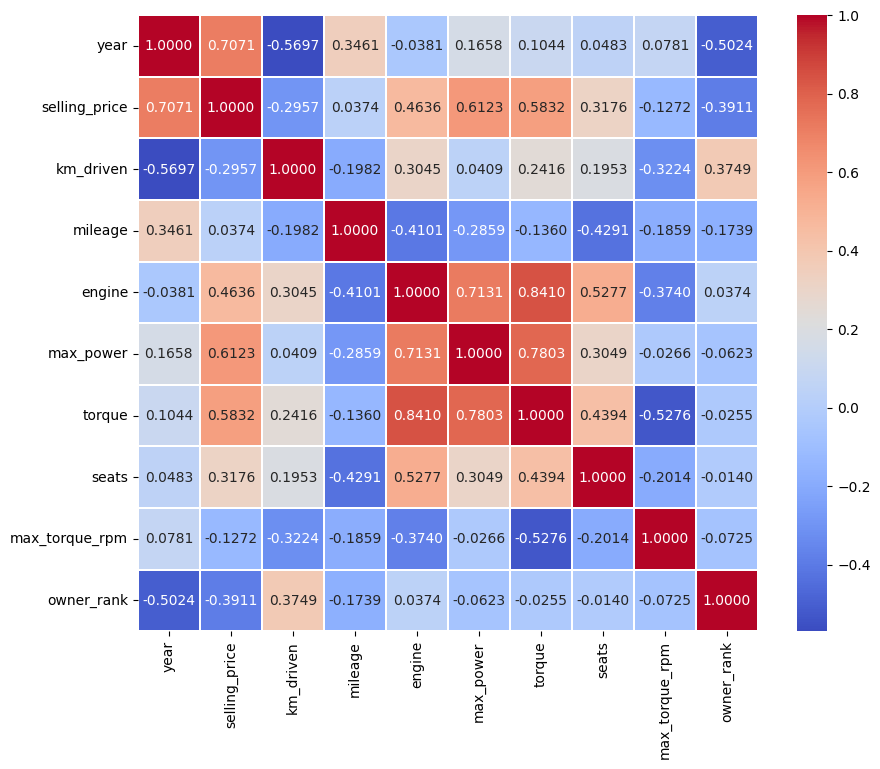

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_spearman, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.3)
plt.show()

Видим обратную корреляцию owner_rank с таргетом. Упражнение было проделано не зря :) Также признак коррелирует с годом — чем больше год выпуска (позже выпущен автомобиль), тем меньше владельцев он успел сменить. Интерпретация поддается логике

Кроме того, усилились коэффициенты корреляции тех признаков, гипотезы о зависимости которых мы выдвинули еще применив корреляцию Пиросона — это значит, что зависимость между ними носит нелинейный характер

**Корреляция phik**

In [48]:
import phik

df_train.phik_matrix(interval_cols=number_columns)
df_corr_phik = df_train.phik_matrix(interval_cols=number_columns)
df_corr_phik

/Users/angelina/Library/Python/3.9/lib/python/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(
/Users/angelina/Library/Python/3.9/lib/python/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


name  year  selling_price  km_driven  fuel  seller_type  \
name           1.000 0.949          0.995      0.000 1.000        0.799   
year           0.949 1.000          0.220      0.082 0.206        0.232   
selling_price  0.995 0.220          1.000      0.000 0.158        0.335   
km_driven      0.000 0.082          0.000      1.000 0.046        0.000   
fuel           1.000 0.206          0.158      0.046 1.000        0.051   
seller_type    0.799 0.232          0.335      0.000 0.051        1.000   
transmission   1.000 0.154          0.463      0.013 0.054        0.128   
owner          0.830 0.419          0.558      0.088 0.031        0.177   
mileage        1.000 0.284          0.649      0.089 0.693        0.068   
engine         1.000 0.213          0.504      0.211 0.644        0.160   
max_power      0.998 0.382          0.872      0.000 0.236        0.332   
torque         1.000 0.185          0.687      0.000 0.350        0.147   
seats          1.000 0.288          0.196      0.096 0.451        0.032   
max_torque_rpm 1.000 0.271          0.204      0.050 0.564        0.149   

                transmission  owner  mileage  engine  max_power  torque  \
name                   1.000  0.830    1.000   1.000      0.998   1.000   
year                   0.154  0.419    0.284   0.213      0.382   0.185   
selling_price          0.463  0.558    0.649   0.504      0.872   0.687   
km_driven              0.013  0.088    0.089   0.211      0.000   0.000   
fuel                   0.054  0.031    0.693   0.644      0.236   0.350   
seller_type            0.128  0.177    0.068   0.160      0.332   0.147   
transmission           1.000  0.097    0.319   0.520      0.512   0.359   
owner                  0.097  1.000    0.151   0.186      0.121   0.061   
mileage                0.319  0.151    1.000   0.582      0.685   0.370   
engine                 0.520  0.186    0.582   1.000      0.721   0.610   
max_power              0.512  0.121    0.685   0.721      1.000   0.825   
torque                 0.359  0.061    0.370   0.610      0.825   1.000   
seats                  0.046  0.047    0.672   0.603      0.570   0.366   
max_torque_rpm         0.031  0.113    0.321   0.641      0.269   0.954   

                seats  max_torque_rpm  
name            1.000           1.000  
year            0.288           0.271  
selling_price   0.196           0.204  
km_driven       0.096           0.050  
fuel            0.451           0.564  
seller_type     0.032           0.149  
transmission    0.046           0.031  
owner           0.047           0.113  
mileage         0.672           0.321  
engine          0.603           0.641  
max_power       0.570           0.269  
torque          0.366           0.954  
seats           1.000           0.317  
max_torque_rpm  0.317           1.000

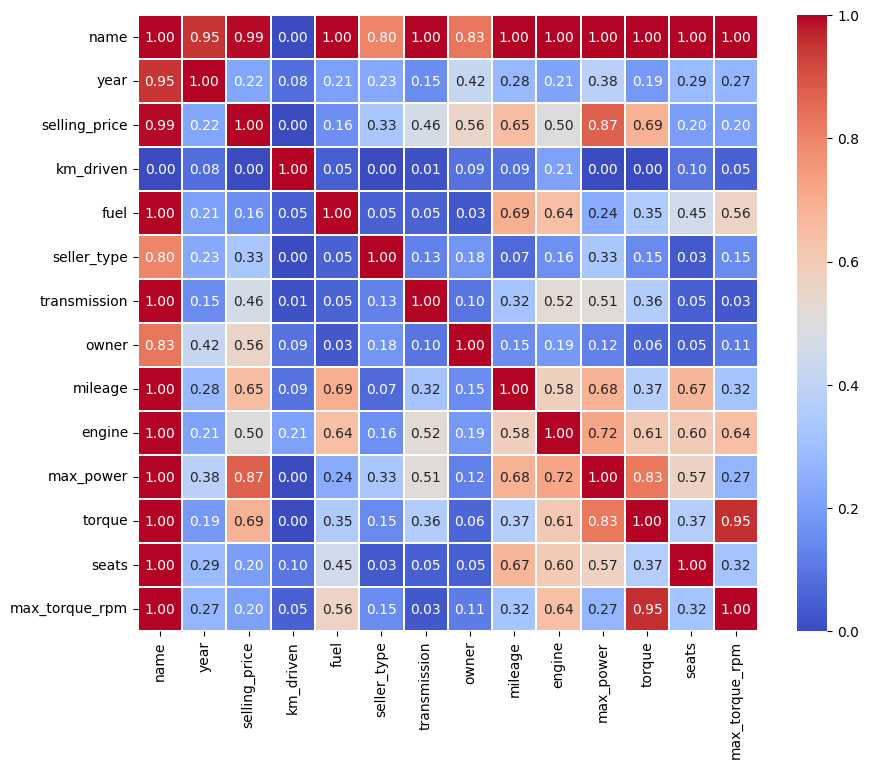

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_phik, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.3)
plt.show()

Корреляция phik интересна нам тем, что ее можно использовать не только для вещественных, но и для категориальных признаков. 
Минус в том, что результаты сложнее интерпретировать  – мы видим тесноту связи, но не ее направленность.

Name (а именно марка + модель + поколение авто) тесно коррелирует почти со всеми признаками в датасете (за исключением пробега). Это ожидаемый результат, так как такая строка несет в себе основные характеристики автомобиля, представленные в датасете.

Кроме name, с таргетом тесно связаны torque, max_power, mileage, owner, engine и transmission.

Для первого подхода обучения можно сказать, что в датасете нет лишних признаков, так как все они так или иначе имеют связь с целевой переменной. Даже km_driven, имеющий в phik 0 связь, показал значения корреляции Пирсона, которые не позволяют нам отбросить его и не использовать в обучении.

В целом, проведенный анализ говорит о качестве отобранных в датасет признаков.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

**Построим боксплоты**

Их удобно использовать для ответа на вопрос об изменении таргета в разных категориях. Такая визуализация помогает исключать категориальные признаки, не влияющие на целевую переменную. Если бы мы обнаружили одинаковое распределение в разных категориях какой либо из переменных, это бы послужило основанием для исключения. 

Кажется важным реализовать данную визуализацию в нашей задаче ввиду скошенности распрделения многих категориальных признаков и сложности определения зависимости на scatter plot целевой переменной и seats (мы рассматривали seats как числовую переменную, тут посмотрим, как на категорию).

In [50]:
def get_boxplot(df, columns):
    # очистим выбросы целевой переменной для лучшей наглядности
    df_clean = remove_outliers(df[columns], ['selling_price'], 0.1, 0.9) 

    sns.boxplot(x=columns[1], y=columns[0], data=df_clean)

    plt.title(f'Boxplots: {columns[0]} by {columns[1]}')
    plt.xlabel(f'{columns[1]}')
    plt.ylabel(f'{columns[0]}')
    plt.show()

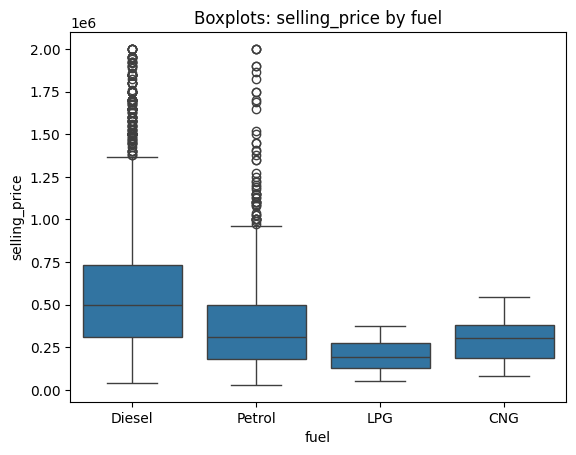

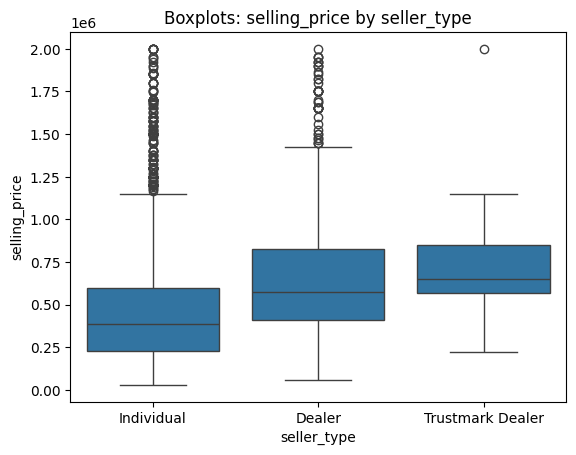

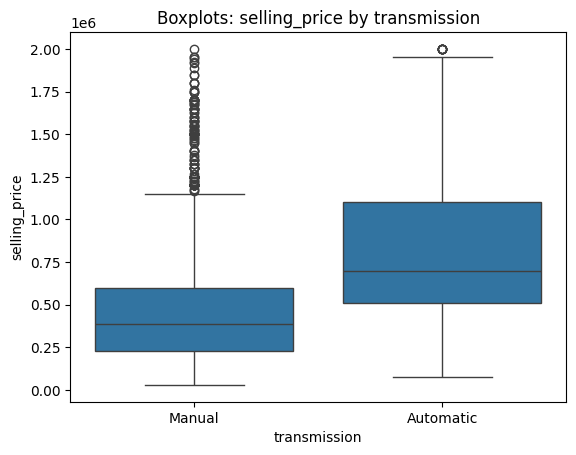

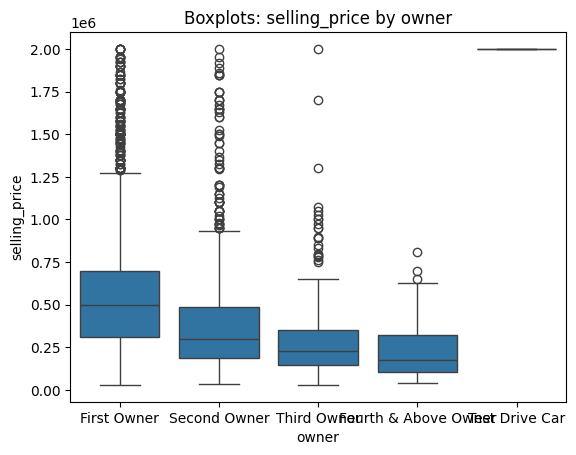

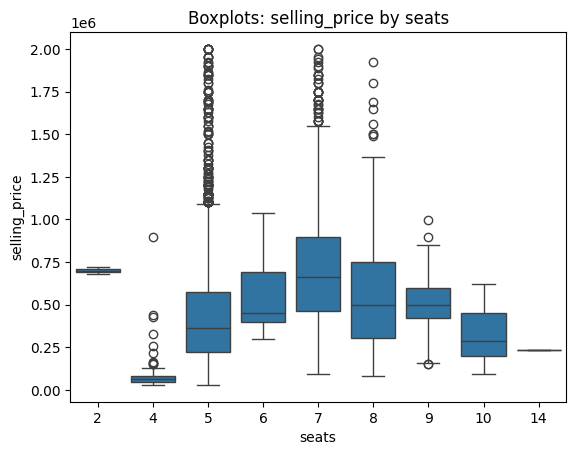

In [51]:
columns = ['selling_price', 'fuel']
get_boxplot(df_train, columns)

columns = ['selling_price', 'seller_type']
get_boxplot(df_train, columns)

columns = ['selling_price', 'transmission']
get_boxplot(df_train, columns)

columns = ['selling_price', 'owner']
get_boxplot(df_train, columns)

columns = ['selling_price', 'seats']
get_boxplot(df_train, columns)

На графиках видим, что разных категорий с одинаковым распрделением в рамках признака нет, поэтому можно продолжить работать с исходным набором переменных.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

*Данные уже разделены на тест и трейн, шаг с разбиением пропустим*

In [52]:
df_train_numeric = df_train.copy()
df_train_numeric = df_train_numeric[number_columns]

df_test_numeric = df_test.copy()
df_test_numeric = df_test_numeric[number_columns]

In [53]:
df_train_numeric.head()

year  selling_price  km_driven  mileage  engine  max_power  torque  seats  \
0  2014         450000     145500   23.400    1248     74.000 190.000      5   
1  2014         370000     120000   21.140    1498    103.520 250.000      5   
2  2010         225000     127000   23.000    1396     90.000 219.670      5   
3  2007         130000     120000   16.100    1298     88.200 112.780      5   
4  2017         440000      45000   20.140    1197     81.860 113.750      5   

   max_torque_rpm  
0        2000.000  
1        2500.000  
2        2750.000  
3        4500.000  
4        4000.000

In [54]:
y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price'])

In [55]:
# Разбили и обработали признак torque — получили +2 вещественного признака вместо одного категориального, поэтому число столбцов — 8
# assert X_train.shape == (5840, 6)

In [56]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price'])

In [57]:
# Аналогично, что и для трейна
# assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Predict
y_train_predict = model_LR.predict(X_train)
y_test_predict = model_LR.predict(X_test)

In [59]:
def get_evaluation_metrics(y_train, y_train_pred, y_test, y_test_pred):
    train_mse = MSE(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    test_mse = MSE(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return train_mse, train_r2, test_mse, test_r2

In [60]:
train_mse, train_r2, test_mse, test_r2 = get_evaluation_metrics(y_train, y_train_predict, y_test, y_test_predict)

print(f'MSE на трейне:{round(train_mse)}, R2 на трейне:{round(train_r2,3)} \
    \nMSE на тесте:{round(test_mse)}, R2 на тесте:{round(test_r2,3)}')

MSE на трейне:114371455064, R2 на трейне:0.601     
MSE на тесте:229640125449, R2 на тесте:0.601


Очень большая квадратичная ошибка, что в целом понятно, ведь мы предсказываем цены на авто, а это число большого масштаба. 
Кроме того, сам характер ошибки (квадрат отклонения), способствует разрастанию MSE.

Всего лишь 60% изменения целевой переменной предсказываются нашими признаками. Это лучше, чем случайное предсказание, но будем стремиться нарастить число. R^2 не различается между трейном и тестом — хороший знак, переобучения не случилось

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [61]:
def r2_score_manual(y_fact, y_pred):
    delta_num = y_fact - y_pred
    delta_den = y_fact - y_fact.mean()
    num = sum(pow(delta_num,2))
    den = sum(pow(delta_den,2))
    r2 = 1 - num / den

    return r2

In [62]:
train_r2_manual = r2_score_manual(y_train, y_train_predict)
test_r2_manual = r2_score_manual(y_test, y_test_predict)

print(f'Значения реализованного руками R2 \nНа трейне:{round(train_r2_manual,3)}, на тесте:{round(test_r2_manual,3)}')

Значения реализованного руками R2 
На трейне:0.601, на тесте:0.601


Совпали со встроенной функцией

R^2 = 1 - (sum((y_fact - y_pred)^2) / sum((y_fact - y_fact_mean)^2))

- sum((y_fact - y_pred)^2) — сумма квадратов разницы фактического значения и предсказанного, по сути, сумма квадратав ошибки. Квадрат используем, чтобы ошибка с разными знаками взаимно не уничтожилась
- sum((y_fact - y_fact_mean)^2)) — сумма квадратов отклонения фактического значения от среднего этого факта. Показывает нам, насколько метрика вариативна сама по себе, возводим в квадрат также для того, чтобы сумма отклонений не обратилась в 0
- делим две суммы друг на друга, чтобы увидеть, какую долю занимают наши ошибки от дейстивительной вариативности таргет-метрики
- вычитаем полученное число из 1, чтобы ответить на вопрос – какая часть вариативности метрики предсказывается параметрами, которые мы подобрали в модель. Так как мы суммировали квадрат ошибок, то вычитание из 1 — остаточная доля после ошибок, действительно предсказанная факторами

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [63]:
def r2_score_adj_manual(y_fact, y_pred, X):
    r2 = r2_score_manual(y_train, y_train_predict)
    num = (1-r2) * (len(y_fact))
    den = len(y_fact) - len(X.columns.to_list()) - 1
    r2_adj = 1 - (num / den)

    return r2_adj

In [64]:
train_r2_adj_manual = r2_score_adj_manual(y_train, y_train_predict, X_train)
test_r2_adj_manual = r2_score_adj_manual(y_test, y_test_predict, X_test)

print(f'Значения реализованного руками R2 adjusted \nНа трейне:{round(train_r2_adj_manual,3)}, на тесте:{round(test_r2_adj_manual,3)}')

Значения реализованного руками R2 adjusted 
На трейне:0.6, на тесте:0.597


R^2 adjusted полезно использовать для небольших выборок. Чем меньше у нас данных для обучения, тем более негативный вклад в качество обучения вносят лишние признаки. В формуле этой метрики заложена поправка на количество объектов и число используемых признаков. Она штрафует за "неиспользуемые" переменные в датасете (те, которые не дают вклада в предсказания таргета) и помогает сравнивать модели с разным числом признаков между собой

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
model_LR_sc = LinearRegression()
model_LR_sc.fit(X_train_scaled, y_train)

y_train_predict_sc = model_LR_sc.predict(X_train_scaled)
y_test_predict_sc = model_LR_sc.predict(X_test_scaled)

train_mse_sc, train_r2_sc, test_mse_sc, test_r2_sc = get_evaluation_metrics(y_train, y_train_predict_sc, y_test, y_test_predict_sc)

print(f'MSE на трейне:{round(train_mse_sc)}, R2 на трейне:{round(train_r2_sc,3)} \
\nMSE на тесте:{round(test_mse_sc)}, R2 на тесте:{round(test_r2_sc,3)}')

MSE на трейне:114371455064, R2 на трейне:0.601 
MSE на тесте:229640125449, R2 на тесте:0.601


Стандартизация не помогла улучшить метрики

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [67]:
features_weights_LR = pd.DataFrame()

features_weights_LR['feature'] = X_train.columns.tolist()
features_weights_LR['weights'] = model_LR_sc.coef_
features_weights_LR['weights_abs'] = features_weights_LR.weights.abs()
features_weights_LR.sort_values('weights_abs', ascending=False)

feature    weights  weights_abs
4       max_power 328189.749   328189.749
0            year 167578.642   167578.642
7  max_torque_rpm -59767.070    59767.070
1       km_driven -48741.731    48741.731
6           seats -31406.968    31406.968
3          engine  20513.862    20513.862
2         mileage -13187.157    13187.157
5          torque   8161.355     8161.355

Наиболее информативным в предсказании цены оказалась мощность (max_power) автомобиля. Затем year и max_torque

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [68]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso()
model_Lasso.fit(X_train_scaled, y_train)

y_train_predict_lasso = model_Lasso.predict(X_train_scaled)
y_test_predict_lasso = model_Lasso.predict(X_test_scaled)

train_mse_lasso, train_r2_lasso, test_mse_lasso, test_r2_lasso = get_evaluation_metrics(y_train, y_train_predict_lasso, 
                                                                                        y_test, y_test_predict_lasso)

print(f'MSE на трейне:{round(train_mse_lasso)}, R2 на трейне:{round(train_r2_lasso,3)} \
\nMSE на тесте:{round(test_mse_lasso)}, R2 на тесте:{round(test_r2_lasso,3)}')

MSE на трейне:114371455078, R2 на трейне:0.601 
MSE на тесте:229640873370, R2 на тесте:0.601


Lasso-регрессия также не помогла улучшить качество

In [69]:
features_weights_Lasso = pd.DataFrame()

features_weights_Lasso['feature'] = X_train.columns.tolist()
features_weights_Lasso['weights'] = model_Lasso.coef_
features_weights_Lasso

feature    weights
0            year 167576.448
1       km_driven -48740.769
2         mileage -13183.892
3          engine  20511.827
4       max_power 328191.125
5          torque   8160.666
6           seats -31402.993
7  max_torque_rpm -59764.977

Зануления весов не произошло. Скорее всего каждый из признаков действительно вносит свой вклад в предсказание целевой переменной. Мы делали такое предположение, когда проводили EDA

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [70]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {'alpha':[0.01, 0.1, 0.5, 1, 10, 20]}

# Добавила фиксированное разбиение и шафл
# У нас небольшой датасет, предполагаю, что объем данных представлен за одинаковый временной период,
# поэтому смешение данных внутри трейна не должно негативно повлиять на качество на тесте
# (в действительности же это помогло немного снизить MSE на тесте в ElasticNet, поэтому оставила так)

cv = KFold(n_splits=10, shuffle=True, random_state=42) 

model_Lasso = Lasso()

# используем R^2, так как в конце будем сравнивать все модели друг с другом, будем фитить их на одну метрику качества
gs = GridSearchCV(model_Lasso, param_grid, cv=cv, scoring='r2') 
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20]}, scoring='r2')

In [71]:
best_model = gs.best_estimator_
print(f'Параметры лучшей модели: {best_model} \nМетрика качества: {round(gs.best_score_,3)} \nВеса признаков: {best_model.coef_}')

Параметры лучшей модели: Lasso(alpha=20) 
Метрика качества: 0.596 
Веса признаков: [167534.15420486 -48722.55762675 -13120.99682303  20473.36042722
 328217.49868147   8147.51955994 -31327.11828903 -59724.91728053]


In [72]:
y_train_predict_lasso_gs = best_model.predict(X_train_scaled)
y_test_predict_lasso_gs = best_model.predict(X_test_scaled)

train_mse_lasso_gs, train_r2_lasso_gs, test_mse_lasso_gs, test_r2_lasso_gs = get_evaluation_metrics(y_train, y_train_predict_lasso_gs, 
                                                                                                    y_test, y_test_predict_lasso_gs)

print(f'MSE на трейне:{round(train_mse_lasso_gs)}, R2 на трейне:{round(train_r2_lasso_gs,3)} \
\nMSE на тесте:{round(test_mse_lasso_gs)}, R2 на тесте:{round(test_r2_lasso_gs,3)}')

MSE на трейне:114371460638, R2 на трейне:0.601 
MSE на тесте:229655119254, R2 на тесте:0.6


**Сколько грид-сёрчу пришлось обучать моделей?** 

Число фолдов * на число параметров alpha, то есть 60.

**Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`?**
- model_Lasso — модель, для которой подбираем гиперпараметры
- param_grid – сетка параметро для перебора
- cv — число фолдов
- scoring – какую метрику максимизируем

**Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?**
- лучшим коэффициентом оказался 20 (вероятно, из-за большого масштаба таргета)
- нет, зануления снова не произошло, мы получили веса для каждого из параметров

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [73]:
from sklearn.linear_model import ElasticNet

param_grid_en = {'alpha': [0.01, 0.1, 0.5, 1, 10, 20],
                 'l1_ratio': [0.1, 0.5, 0.9]
                }

model_EN = ElasticNet()

gs_en = GridSearchCV(model_EN, param_grid_en, cv=cv, scoring='r2')
gs_en.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='r2')

In [74]:
best_model_en = gs_en.best_estimator_
print(f'Параметры лучшей модели: {best_model_en} \nМетрика качества: {round(gs_en.best_score_,3)} \nВеса признаков: {best_model_en.coef_}')

Параметры лучшей модели: ElasticNet(alpha=0.1, l1_ratio=0.9) 
Метрика качества: 0.597 
Веса признаков: [166242.0175906  -49168.74598058 -11726.77624149  25963.53852706
 320014.50353321  11651.31423985 -32412.06593766 -57054.57613658]


In [75]:
y_train_predict_en = best_model_en.predict(X_train_scaled)
y_test_predict_en = best_model_en.predict(X_test_scaled)

train_mse_en, train_r2_en, test_mse_en, test_r2_en = get_evaluation_metrics(y_train, y_train_predict_en,
                                                                            y_test, y_test_predict_en)

print(f'MSE на трейне:{round(train_mse_en)}, R2 на трейне:{round(train_r2_en,3)} \
\nMSE на тесте:{round(test_mse_en)}, R2 на тесте:{round(test_r2_en,3)}')

MSE на трейне:114399200918, R2 на трейне:0.601 
MSE на тесте:231021529856, R2 на тесте:0.598


**Сколько грид-сёрчу пришлось обучать моделей?**

len(alpha) * len(l1_ratio) * cv, то есть 180
  
**Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?**

alpha=0.1, l1_ratio=0.9

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [76]:
from itertools import combinations

# Реализация класса
class L0Regularization:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.best_model = None
        self.best_features = None
        self.min_loss = float('inf')

    def loss_func(self, X, y, weights, intercept):
        y_pred = np.dot(X, weights) + intercept
        mse = np.mean((y - y_pred) ** 2)
        l0_param = self.alpha * np.sum(weights != 0)
        loss = mse + l0_param
        
        return loss

    def fit(self, X, y):
        n_features = X.shape[1]
        feature_names = np.arange(n_features)

        # Перебор на минимальный лосс, полученный при помощи L0
        for feature in range(1, n_features + 1):
            for feature_subset in combinations(feature_names, feature):
                X_subset = X[:, feature_subset]
                model = LinearRegression() # используем, чтобы получить веса и свободный коэффициент
                model.fit(X_subset, y)

                weights = model.coef_
                intercept = model.intercept_
                loss = self.loss_func(X_subset, y, weights, intercept)

                if loss < self.min_loss: 
                    self.min_loss = loss
                    self.best_model = (weights, intercept)
                    self.best_features = feature_subset

        return self

    def predict(self, X):
        if self.best_model is None:
            raise Exception('Модель не обучена')
        weights, intercept = self.best_model
        X_subset = X[:, self.best_features]
        
        return np.dot(X_subset, weights) + intercept

Тест реализации без перебора alpha (в реализации по умолчанию равно 1)

In [77]:
model_L0 = L0Regularization()
model_L0.fit(X_train_scaled, y_train)

y_train_predict_l0 = model_L0.predict(X_train_scaled)
y_test_predict_l0 = model_L0.predict(X_test_scaled)

In [78]:
train_mse_l0, train_r2_l0, test_mse_l0, test_r2_l0 = get_evaluation_metrics(y_train, y_train_predict_l0,
                                                                            y_test, y_test_predict_l0)

print(f'MSE на трейне:{round(train_mse_l0)}, R2 на трейне:{round(train_r2_l0,3)} \
\nMSE на тесте:{round(test_mse_l0)}, R2 на тесте:{round(test_r2_l0,3)}')

MSE на трейне:114371455064, R2 на трейне:0.601 
MSE на тесте:229640125449, R2 на тесте:0.601


In [79]:
best_features = [X_train.columns.tolist()[i] for i in model_L0.best_features]

print(f'Лучшие фичи после L0 регуляризации: {best_features} \nВеса для фич: {model_L0.best_model[0]}')

Лучшие фичи после L0 регуляризации: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm'] 
Веса для фич: [167578.64176593 -48741.73118579 -13187.15726466  20513.86170356
 328189.74851891   8161.35522296 -31406.96808177 -59767.06995034]


Подбор гиперпараметра alpha для улучшения качества модели с L0 регуляризацией

In [80]:
# В L0 регуляризации к MSE прибавляется штраф по числу ненулевых коэффициентов
# Так как мы предсказываем цены авто, наше MSE получается очень большим в абсолютном выражении
# Поэтому, чтобы увидеть какие-нибудь изменения на переборе гиперпараметра, были взяты в том числе очень большие в абсолютном выражении alpha

alphas = [0.01, 0.1, 0.5, 1, 10, 100000000, 500000000]
results = []

for alpha in alphas:
    model_L0 = L0Regularization(alpha=alpha)
    model_L0.fit(X_train_scaled, y_train)
    
    y_predict_l0 = model_L0.predict(X_train_scaled)
    
    train_mse_l0 = MSE(y_train, y_predict_l0)
    train_r2_l0 = r2_score(y_train, y_predict_l0)
    
    results.append({
        'alpha': alpha,
        'train_r2': train_r2_l0,
        'train_mse': train_mse_l0,
        'selected_features': len(model_L0.best_features)
    })

results_df = pd.DataFrame(results)
results_df['train_mse'] = results_df.train_mse.astype(int)
results_df

alpha  train_r2     train_mse  selected_features
0         0.010     0.601  114371455064                  8
1         0.100     0.601  114371455064                  8
2         0.500     0.601  114371455064                  8
3         1.000     0.601  114371455064                  8
4        10.000     0.601  114371455064                  8
5 100000000.000     0.601  114468128532                  6
6 500000000.000     0.599  114860398736                  4

При малых значениях alpha результаты на трейне не различаются от заданного дефолтного значения 1. 
При увеличении параметра — снижается число признаков, но качество на трейне падает. Видим тут большую специфику, связанную с масштабом нашей целевой переменной — selling price.

В итоге по качеству оставим самую первую итерацию с alpha = 1

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [81]:
df_train.name.nunique()

1924

In [82]:
df_train.name.str.split().apply(lambda x: ' '.join(x[:2])).nunique()

205

In [83]:
df_train.name.str.split().str[0].nunique()

30

Наша задача — снизить количество категорий, поэтому в первой обработке name оставим только бренд авто. 
Почему сразу не добавляем модель? У нас не так много данных, поэтому разрастание фич (будем делать OHE) может привести к снижению качества

In [84]:
X_train_cat = df_train.copy()
X_train_cat['name'] = X_train_cat.name.str.split().str[0]
X_train_cat = X_train_cat.drop(columns=['selling_price'])


X_test_cat = df_test.copy()
X_test_cat['name'] = X_test_cat.name.str.split().str[0]
X_test_cat = X_test_cat.drop(columns=['selling_price'])

In [85]:
# Из-за предобработки torque колонок стало больше
# assert X_train_cat.shape == (5840, 11)

In [86]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

In [87]:
X_test_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     1000    1000        1000         1000         1000
unique      25       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq       290     534         837          877          623

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [88]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = X_train_cat.select_dtypes(include=['object']).columns.tolist()
categorical_columns.append('seats')

Мы видим, что число уникальных категорий в name не совпадает между трейном и тестом. Если в тесте не окажется закодированных категорий – это не критично. Гораздо более важная ситуация, когда напротив, мы встречаем в тесте значения, которых не было в трейне. Проверим этот случай

In [89]:
[cat for cat in X_test_cat.name.unique() if cat not in X_train_cat.name.unique()]

['Opel', 'Ashok']

Добавим условие игнорирования новых категорий

In [90]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')  # исключаем одну категорию, игнорируем новые категории, которых не было в трейне
ohe.fit(X_train_cat[categorical_columns]) # фитим только на данные трейна

train_encoded = ohe.transform(X_train_cat[categorical_columns]).toarray()
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out())

test_encoded = ohe.transform(X_test_cat[categorical_columns]).toarray()
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out())

# Соединим категориальные признаки с вещественными. Вещественные признаки оставим стандартизированными 
# Тк. seats перекочевал в категориальные, заново обучим стандартизатор

number_columns_new = number_columns.to_list()
number_columns_new = [col for col in number_columns_new if col not in ['selling_price', 'seats']]

scaler = StandardScaler()
scaler.fit(X_train[number_columns_new])

X_train_scaled_for_cat = scaler.transform(X_train[number_columns_new])
X_test_scaled_for_cat = scaler.transform(X_test[number_columns_new])

X_train_cat_ohe = pd.concat([train_encoded_df, pd.DataFrame(X_train_scaled_for_cat, columns=number_columns_new)], axis=1)
X_test_cat_ohe  = pd.concat([test_encoded_df, pd.DataFrame(X_test_scaled_for_cat, columns=number_columns_new)], axis=1)

/Users/angelina/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [91]:
X_train_cat_ohe.shape

(5840, 54)

In [92]:
X_test_cat_ohe.shape

(1000, 54)

Размерность совпадает, значит, кодирование обученное на трейне верно сработало на тесте

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

**Как корректно работать с OHE преобразованием?**
- Обучаем энкодер на трейне, применяя полученное обучение к тесту. Это нужно, чтобы не допустить утечки данных и не утяжелять модель ненужными признаками (если в трейне нет каких-то категорий из теста, для них не будет и весов)
- Удаляем одну категорию для каждого признака, ее значение можно будет раскодировать по уже имеющимся категориям (False для всех категорий)
- Не используем в тесте признаки, которые не кодировали в трейне (handle_unknown='ignore')

**Почему мы удаляем один столбец?**

Помогает избежать мультиколлинеарности (взаимной зависимости) между признаками, так как мы и так сможем определить удаленную категорию через False значения оставшихся не удаленных.

**Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?**

Нет, так как в случае с OHE значения категорий внутри первичного признака зависят друг от друга. При использовании drop='first' (удалении одной из категорий как способа кодирования), модель будет причислять не важные категории к удаленной, что исказит смысл. 
В таком случае будет правильным задать общую категорию для всех малозначимых, чтобы снизить количество категорий, сохранив при этом смысл кодирования.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_ridge = Ridge()

param_grid = {'alpha':[0.01, 0.1, 0.5, 1, 10, 20]}

# cv из прошлых шагов, зафиксированное через KFold
gs_ridge = GridSearchCV(model_ridge, param_grid, cv=cv, scoring='r2')
gs_ridge.fit(X_train_cat_ohe, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20]}, scoring='r2')

In [94]:
best_model = gs_ridge.best_estimator_
print(f'Параметры лучшей модели: {best_model} \nМетрика качества: {round(gs_ridge.best_score_,3)} \nВеса признаков: {best_model.coef_}')

Параметры лучшей модели: Ridge(alpha=1) 
Метрика качества: 0.731 
Веса признаков: [ 389685.90920388  956070.83876588 -517818.46964704   10388.11894987
 -533768.67518458 -500179.24799317 -384765.8218694  -444950.22602718
 -455879.36218227 -416869.87564143   36610.98393398  593748.89048895
   86060.61448097  -50496.86449122  850321.01903005 1516654.30534612
  113065.94869772 -450145.88894254 -382586.95589172  569980.32492098
 -134491.39471297 -453998.59942435  -33553.9316936  -465675.00202601
 -457010.55384168 -537440.69173856 -164200.62878929 -492424.51934216
 1612986.89393224   39356.45781174  181001.00940587   34060.90924125
  -64223.08940216  -40310.56084603  -91359.34791816  -40602.49502906
  -56630.55311938 2511827.71141238  -38398.50319258  335947.99867377
  -78248.17861055 -142307.37401074   -6028.14997043  -62317.45298982
  -18925.36163547   25550.95825233  -46586.48692528  167445.70629531
  -28844.56452636   14905.83602044   28481.43821613  204883.78371857
    9812.41624855  -3

In [95]:
features_weights_Ridge = pd.DataFrame()

features_weights_Ridge['feature'] = X_train_cat_ohe.columns.tolist()
features_weights_Ridge['weights'] = best_model.coef_
features_weights_Ridge['weights_abs'] = features_weights_Ridge.weights.abs()
features_weights_Ridge.sort_values('weights_abs', ascending=False).head(10)

feature     weights  weights_abs
37  owner_Test Drive Car 2511827.711  2511827.711
28            name_Volvo 1612986.894  1612986.894
15            name_Lexus 1516654.305  1516654.305
1               name_BMW  956070.839   956070.839
14             name_Land  850321.019   850321.019
11           name_Jaguar  593748.890   593748.890
19    name_Mercedes-Benz  569980.325   569980.325
25             name_Tata -537440.692   537440.692
4            name_Datsun -533768.675   533768.675
2         name_Chevrolet -517818.470   517818.470

In [96]:
y_train_predict_ridge_gs = best_model.predict(X_train_cat_ohe)
y_test_predict_ridge_gs = best_model.predict(X_test_cat_ohe)

train_mse_ridge_gs, train_r2_ridge_gs, test_mse_ridge_gs, test_r2_ridge_gs = get_evaluation_metrics(y_train, y_train_predict_ridge_gs, 
                                                                                                    y_test, y_test_predict_ridge_gs)

print(f'MSE на трейне:{round(train_mse_ridge_gs)}, R2 на трейне:{round(train_r2_ridge_gs,3)} \
\nMSE на тесте:{round(test_mse_ridge_gs)}, R2 на тесте:{round(test_r2_ridge_gs,3)}')

MSE на трейне:65293204771, R2 на трейне:0.772 
MSE на тесте:124762359538, R2 на тесте:0.783


Мы получили резкий скачок в качестве добавив категориальные переменные. R^2 моделей, обученных только на вещественных признаках, не превышал 0.6, тогда как на последнем этапе Ridge регресси с подобранными гиперпараметрами нам удалось получить R^2 0.78.

Топ фич с наибольшим модулем веса — owner_Test_Drive_Car и бренд авто.

Если продолжать улучшение модели, то нужно отталкиваться от полученного набора признаков.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
   * посчитать произведения / частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
   * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

3.   *Добыть новые признаки:*
   * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
   * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

5.   *Поработать с уже имеющимися:*
   * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
   * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
  * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
  * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

**Что было сделано**

Алгоритм — вводила один новый признак и измеряла качество. Если оно не менялось / снижалось, убирала введенный признак, возвращаясь к модели предыдущего шага. Для каждого изменения обучаща Ridge регрессию.

- Пробовала добавить новые признаки — возраст  и пробег км в год, но качество становилось хуже, чем с одним доп признаком power_per_liter
- Попыталась прологарифмировать km_driven — не дало улучшений, но получила качество выше с логарифмом engine
- Год все-таки связан с таргетом гиперболической зависимостью, качество модели лучше, чем на квадрате
- Категориальную переменную owner можно представить в виде вещественной ранговой. Test Drive Car присваиваем самое высокое значение. С точки зрения бизнес-смысла чем меньше ранг, тем более привлекательное / дорогое авто, а авто, не бывшее во владении у частника, всегда оценивается рынком ниже. Заодно избавимся от необходимости кодировать признак и снизим число независимых переменных (на нашем небольшом датасете дало буст в качестве)
- Попробуем по-другому предобработать name. На первом шаге оставили только марку автомобиле. Проведем итерацию обучения, сохранив еще и модель
- Пробовала удалять выбросы (самые экстремальные значения) — получила снижение в качестве. Сделала реализацию замены выбросов на граничные значения, подобрала квантили, которые дают наилучшее качество итоговой модели — 0.15 и 0.85

В результате R^2 на тесте после всех проделанных шагов вырос до 0.906 против 0.783 до фиче инжиниринга.

In [97]:
def add_extra_features(df):
    df['power_per_liter'] = df.max_power / df.engine
    #df['age'] = 2024 - df.year + 1 # возраст машины определяется идущим годом
    #df['km_driven_per_year'] = df.km_driven / df.age # популярный признак при выкупе авто дилерами
    
    return df

def feature_log(df, feature):
    name = f'log_{feature}'
    df[name] = np.log(df[feature])
    df = df.drop(columns=[feature])
    
    return df

def feature_hyper(df, feature):
    name = f'hp_{feature}'
    df[name] = df[feature] ** 3
    df = df.drop(columns=[feature])
    
    return df

def replace_outliers(df, columns, q1=0.25, q3=0.75):
    for column in columns:
        Q1 = df[column].quantile(q1)
        Q3 = df[column].quantile(q3)
        IQR = Q3 - Q1
        
        border_left = max(0, Q1 - 1.5 * IQR)  # наши вещественные признаки строго положительные
        border_right = Q3 + 1.5 * IQR
        
        # Заменяем значения, выходящие за границы
        df[column] = df[column].apply(lambda x: border_left if x < border_left else (border_right if x > border_right else x))
    
    return df

In [98]:
rank_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5 
}

In [99]:
X_train_copy = df_train.copy()
X_train_copy = X_train_copy.drop(columns=['selling_price'])

X_test_copy = df_test.copy()
X_test_copy = X_test_copy.drop(columns=['selling_price'])

In [100]:
X_train_copy['owner'] = X_train_copy['owner'].map(rank_mapping)
X_test_copy['owner'] = X_test_copy['owner'].map(rank_mapping)

In [101]:
# Обновим дикт с медианами, чтобы потом забрать в сервис
dict_medians['owner'] = X_train_copy.owner.median()
dict_medians

{'mileage': 19.3,
 'engine': 1248.0,
 'max_power': 81.86,
 'torque': 160.0,
 'seats': 5.0,
 'max_torque_rpm': 3000.0,
 'year': 2014,
 'km_driven': 70000.0,
 'owner': 1.0}

In [102]:
categorical_columns = X_train_copy.select_dtypes(include=['object']).columns.tolist()
categorical_columns.append('seats')

In [103]:
categorical_columns

['name', 'fuel', 'seller_type', 'transmission', 'seats']

In [104]:
numerical_columns = [col for col in df_train.columns if col not in categorical_columns]
numerical_columns.remove('selling_price')
numerical_columns

['year',
 'km_driven',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'max_torque_rpm']

In [105]:
X_train_copy = replace_outliers(X_train_copy, numerical_columns, 0.15, 0.85)

In [106]:
X_train_copy['name'] = X_train_copy.name.str.split().apply(lambda x: ' '.join(x[:2]))
X_test_copy['name'] = X_test_copy.name.str.split().apply(lambda x: ' '.join(x[:2]))

In [107]:
X_train_new = add_extra_features(X_train_copy)
X_train_new = feature_hyper(X_train_new, 'year')
X_train_new = feature_log(X_train_new, 'engine')

X_test_new = add_extra_features(X_test_copy)
X_test_new = feature_hyper(X_test_new, 'year')
X_test_new = feature_log(X_test_new, 'engine')

In [108]:
numerical_columns = [col for col in X_train_new.columns if col not in categorical_columns]
numerical_columns

['km_driven',
 'owner',
 'mileage',
 'max_power',
 'torque',
 'max_torque_rpm',
 'power_per_liter',
 'hp_year',
 'log_engine']

In [109]:
# Переобучим скейлер
scaler = StandardScaler()
scaler.fit(X_train_new[numerical_columns])

X_train_scaled_new = scaler.transform(X_train_new[numerical_columns])
X_test_scaled_new = scaler.transform(X_test_new[numerical_columns])

In [110]:
# Переобучим энкодер
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
ohe.fit(X_train_new[categorical_columns])

train_encoded = ohe.transform(X_train_new[categorical_columns]).toarray()
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out())

test_encoded = ohe.transform(X_test_new[categorical_columns]).toarray()
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out())

/Users/angelina/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [111]:
X_train_new_preprocessed = pd.concat([train_encoded_df, pd.DataFrame(X_train_scaled_new, columns=numerical_columns)], axis=1)
X_test_new_preprocessed = pd.concat([test_encoded_df, pd.DataFrame(X_test_scaled_new, columns=numerical_columns)], axis=1)

In [112]:
model_ridge_new = Ridge()

param_grid = {'alpha':[0.01, 0.1, 0.5, 1, 10, 20]}

# cv из прошлых шагов, зафиксированное через KFold
gs_ridge_new = GridSearchCV(model_ridge_new, param_grid, cv=cv, scoring='r2')
gs_ridge_new.fit(X_train_new_preprocessed, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20]}, scoring='r2')

In [113]:
best_model = gs_ridge_new.best_estimator_
print(f'Параметры лучшей модели: {best_model} \nМетрика качества: {round(gs_ridge_new.best_score_,3)} \nВеса признаков: {best_model.coef_}')

Параметры лучшей модели: Ridge(alpha=0.5) 
Метрика качества: 0.771 
Веса признаков: [ 3.23337219e+05  5.06543525e+04  7.23653727e+05  9.29498278e+04
  2.06600611e+06  4.40050353e+05  5.06019295e+05 -7.83871574e+04
  1.86867955e+04  8.57334036e+05  2.76097787e+06 -4.16161730e+05
  2.99123949e+05  9.10363851e+04  3.08078967e+06  8.16266825e+05
  3.22329782e+06 -2.34567275e+05 -3.81426574e+05 -7.69510514e+05
 -8.76069179e+05 -2.50463455e+05 -5.20873482e+05 -3.46947425e+05
 -2.44925922e+05  4.47414679e+04 -5.98968024e+05  9.29889746e+04
 -3.61155219e+05 -4.21923555e+05 -3.24506458e+05 -3.22654818e+05
 -3.34679110e+05 -2.17886686e+05 -3.06775818e+05 -1.33275022e+03
 -2.54948505e+05 -2.23777688e+05 -3.15703100e+05 -1.64022556e+05
 -2.70541724e+05 -2.31359468e+05 -2.40554580e+05 -3.25429094e+05
 -3.05551306e+05 -2.14503156e+05 -2.63984207e+05 -9.35252674e+05
 -3.73134533e+05 -1.66936880e+05 -8.57935515e+04 -2.96244521e+05
 -4.37631882e+05 -2.04983407e+05 -2.83617289e+05 -2.46464735e+05
 -2.65

In [114]:
y_train_predict_ridge_new = best_model.predict(X_train_new_preprocessed)
y_test_predict_ridge_new = best_model.predict(X_test_new_preprocessed)

train_mse_ridge_new, train_r2_ridge_new, test_mse_ridge_new, test_r2_ridge_new = get_evaluation_metrics(y_train, y_train_predict_ridge_new, 
                                                                                                        y_test, y_test_predict_ridge_new)

print(f'MSE на трейне:{round(train_mse_ridge_new)}, R2 на трейне:{round(train_r2_ridge_new,3)} \
\nMSE на тесте:{round(test_mse_ridge_new)}, R2 на тесте:{round(test_r2_ridge_new,3)}')

MSE на трейне:35146915847, R2 на трейне:0.877 
MSE на тесте:53848457411, R2 на тесте:0.906


Получили наивысшее качество на R^2 среди всех ранее обученных моделей

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [115]:
def business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    accurate_predictions = (y_pred/y_true >= 0.9) & (y_pred/y_true <= 1.1)
    metric = sum(accurate_predictions) / len(y_true)

    return metric

In [116]:
dict_predictions = {'y_test_predict': y_test_predict,
                    'y_test_predict_sc': y_test_predict_sc,
                    'y_test_predict_lasso': y_test_predict_lasso,
                    'y_test_predict_lasso_gs': y_test_predict_lasso_gs,
                    'y_test_predict_en': y_test_predict_en,
                    'y_test_predict_l0': y_test_predict_l0, 
                    'y_test_predict_ridge_gs': y_test_predict_ridge_gs,
                    'y_test_predict_ridge_new': y_test_predict_ridge_new}

dict_models_results = {}
for key in dict_predictions.keys():
    metric = business_metrics(y_test, dict_predictions.get(key))
    dict_models_results[key] = metric

df_models_results = pd.DataFrame.from_dict(dict_models_results, orient="index").reset_index()
df_models_results.columns = ['predict_from_model', 'business_metrics']
df_models_results

predict_from_model  business_metrics
0            y_test_predict             0.243
1         y_test_predict_sc             0.243
2      y_test_predict_lasso             0.243
3   y_test_predict_lasso_gs             0.243
4         y_test_predict_en             0.248
5         y_test_predict_l0             0.243
6   y_test_predict_ridge_gs             0.305
7  y_test_predict_ridge_new             0.297

Судя по метрике "доля верно предсказанных прогнозов" лучше всего себя показала Ridge-модель, которую получили до фиче инжиниринга.

На втором месте — наша последняя модель с обновлёнными признаками.

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [117]:
# Доля отрицательных ошибок среди всех "верно предсказанных" наблюдений
def accurate_negative_error_share(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    negative_predictions_accurate = (y_pred/y_true >= 0.9) & (y_pred/y_true < 1)
    accurate_predictions = (y_pred/y_true >= 0.9) & (y_pred/y_true <= 1.1)
    metric = sum(negative_predictions_accurate) / sum(accurate_predictions)

    return metric

# Доля объема негативного отклонения от MAE (в парае с MAE)
def negative_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    errors_sum_negative = sum([abs(pred - true) for pred, true in zip(y_pred, y_true) if pred < true])
    errors_sum_all = sum(abs(y_pred - y_true))

    share_of_neg_in_abs_error = errors_sum_negative / errors_sum_all
    
    mae = sum(abs(y_pred - y_true)) / len(y_true)
    
    return (mae, share_of_neg_in_abs_error) # возвращаем кортеж

In [118]:
dict_models_results_neg_acc = {}
dict_models_results_neg_abs = {}

for key in dict_predictions.keys():
    metric = accurate_negative_error_share(y_test, dict_predictions.get(key))
    metric_tuple = negative_mae(y_test, dict_predictions.get(key))
    dict_models_results_neg_acc[key] = metric
    dict_models_results_neg_abs[key] = metric_tuple


df_models_neg_acc = pd.DataFrame.from_dict(dict_models_results_neg_acc, orient="index").reset_index()
df_models_neg_acc.columns = ['predict_from_model', 'negative_share_from_accurate']
df_models_neg_abs = pd.DataFrame.from_dict(dict_models_results_neg_abs, orient="index").reset_index()
df_models_neg_abs.columns = ['predict_from_model', 'mae', 'negative_share']

df_models_results_all = df_models_results \
    .merge(df_models_neg_acc, on=['predict_from_model'], how='left') \
    .merge(df_models_neg_abs, on=['predict_from_model'], how='left')

df_models_results_all

predict_from_model  business_metrics  negative_share_from_accurate  \
0            y_test_predict             0.243                         0.535   
1         y_test_predict_sc             0.243                         0.535   
2      y_test_predict_lasso             0.243                         0.535   
3   y_test_predict_lasso_gs             0.243                         0.535   
4         y_test_predict_en             0.248                         0.532   
5         y_test_predict_l0             0.243                         0.535   
6   y_test_predict_ridge_gs             0.305                         0.492   
7  y_test_predict_ridge_new             0.297                         0.508   

         mae  negative_share  
0 220969.398           0.621  
1 220969.398           0.621  
2 220969.103           0.621  
3 220963.472           0.621  
4 220358.068           0.622  
5 220969.398           0.621  
6 165613.552           0.571  
7 125641.308           0.546

Добавила 2 метрики: доля негативных прогнозов от "верно предсказанных" значений, и доля отклонений от всего объема отклонений (+ mae).

Метрики получились не однозначными. С точки зрения "верно предсказанных" и положительных среди них значений лидирует всё та же модель без фиче инжиниринга. А вот в общем объеме отклонений недопрогноза оказалось меньше у модели с самой последней итерации (также в ней значительно снизился mae).

В таком случае перед нами стоит трейд-оф между сгенерированными бизнес-метриками.
Оставим модель с самой последней итерации под реализацию сервиса, так как она также является одной из лидирующих по бизнес-метрикам + показала наивысшее качество.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

**Сохранение обученных файлов**

In [119]:
import joblib

In [120]:
dict_medians

{'mileage': 19.3,
 'engine': 1248.0,
 'max_power': 81.86,
 'torque': 160.0,
 'seats': 5.0,
 'max_torque_rpm': 3000.0,
 'year': 2014,
 'km_driven': 70000.0,
 'owner': 1.0}

In [121]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(ohe, 'onehot_encoder.pkl')
joblib.dump(dict_medians, 'dict_medians.pkl')
joblib.dump(rank_mapping, 'owner_rank_mapping.pkl')
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [122]:
# Данные для тестирования сервиса
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
df_test.drop(columns=['selling_price']).to_csv('endpoint_test.csv', index=False)

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Пусть будет кот @roman_zalesinskii